# Wildfire Analysis
## By: David Jean

Data can be found here:
https://www.kaggle.com/datasets/braddarrow/23-million-wildfires

In [137]:
#importing libraries
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import re
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree, preprocessing
import sklearn.ensemble as ske
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from category_encoders.target_encoder import TargetEncoder
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, plot_roc_curve
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, roc_auc_score, roc_curve, auc

import seaborn as sns

# plotly
# import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
#pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
# Set display to show up to 200 columns in dataframe

sns.reset_orig()
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows', 50)

# Set default color palette to colorblind
plt.style.use('seaborn-colorblind')

# Set the aesthetic style of any plots 
sns.set_style('whitegrid') 
sns.color_palette("colorblind")
%config InlineBackend.figure_format='retina'

# Enable the inline plotting
%matplotlib inline
# Trick to widen the screen
from IPython.core.display import display, HTML
#Widens the code landscape 
display(HTML("<style>.container { width:95% !important; }</style>"))

C:\Users\david\AppData\Local\Temp\ipykernel_9604\998000563.py:18: DeprecationWarning:

Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display



--------

In [3]:
import os

In [4]:
os.getcwd()

'c:\\Users\\david\\Documents\\masters\\6330\\data'

In [5]:
#import the data.csv file
df = pd.read_csv('data.csv')

C:\Users\david\AppData\Local\Temp\ipykernel_9604\1742179268.py:2: DtypeWarning:

Columns (9,11,12,13,14,15,16,17,18,19,26,27,36,38) have mixed types. Specify dtype option on import or set low_memory=False.



# Exploratory Data Analysis

In [6]:
#show an indexed list of all the column names
list(enumerate(df.columns))

[(0, 'OBJECTID'),
 (1, 'Shape'),
 (2, 'FOD_ID'),
 (3, 'FPA_ID'),
 (4, 'SOURCE_SYSTEM_TYPE'),
 (5, 'SOURCE_SYSTEM'),
 (6, 'NWCG_REPORTING_AGENCY'),
 (7, 'NWCG_REPORTING_UNIT_ID'),
 (8, 'NWCG_REPORTING_UNIT_NAME'),
 (9, 'SOURCE_REPORTING_UNIT'),
 (10, 'SOURCE_REPORTING_UNIT_NAME'),
 (11, 'LOCAL_FIRE_REPORT_ID'),
 (12, 'LOCAL_INCIDENT_ID'),
 (13, 'FIRE_CODE'),
 (14, 'FIRE_NAME'),
 (15, 'ICS_209_PLUS_INCIDENT_JOIN_ID'),
 (16, 'ICS_209_PLUS_COMPLEX_JOIN_ID'),
 (17, 'MTBS_ID'),
 (18, 'MTBS_FIRE_NAME'),
 (19, 'COMPLEX_NAME'),
 (20, 'FIRE_YEAR'),
 (21, 'DISCOVERY_DATE'),
 (22, 'DISCOVERY_DOY'),
 (23, 'DISCOVERY_TIME'),
 (24, 'NWCG_CAUSE_CLASSIFICATION'),
 (25, 'NWCG_GENERAL_CAUSE'),
 (26, 'NWCG_CAUSE_AGE_CATEGORY'),
 (27, 'CONT_DATE'),
 (28, 'CONT_DOY'),
 (29, 'CONT_TIME'),
 (30, 'FIRE_SIZE'),
 (31, 'FIRE_SIZE_CLASS'),
 (32, 'LATITUDE'),
 (33, 'LONGITUDE'),
 (34, 'OWNER_DESCR'),
 (35, 'STATE'),
 (36, 'COUNTY'),
 (37, 'FIPS_CODE'),
 (38, 'FIPS_NAME')]

In [7]:
df.sample(10)

,OBJECTID,Shape,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,LOCAL_INCIDENT_ID,FIRE_CODE,FIRE_NAME,ICS_209_PLUS_INCIDENT_JOIN_ID,ICS_209_PLUS_COMPLEX_JOIN_ID,MTBS_ID,MTBS_FIRE_NAME,COMPLEX_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,NWCG_CAUSE_CLASSIFICATION,NWCG_GENERAL_CAUSE,NWCG_CAUSE_AGE_CATEGORY,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME
1465545,1465546,b'\x00\x01\xad\x10\x00\x00h\xe2\xea\xee\xc4pZ\...,201107596,W-627169,FED,DOI-WFMI,BLM,USCORGD,Royal Gorge Field Office,COCCD,Front Range Center,NaN,NaN,NaN,COPPER MOUNTAIN,NaN,NaN,NaN,NaN,NaN,2011,8/31/2011,243,1535.0,Natural,Natural,NaN,9/1/2011,244.0,1528.0,0.1,A,38.506190,-105.762030,BLM,CO,Fremont,8043.0,Fremont County
1167355,1167356,b'\x00\x01\xad\x10\x00\x00t\x97D#c.V\xc0\x08\x...,1419394,MSARCH_38769,NONFED,ST-MSMSS,ST/C&L,USMSMSS,Mississippi Forestry Commission,MSMSS,Mississippi Forestry Commission,NaN,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1998,5/28/1998,148,600.0,Human,Debris and open burning,NaN,5/28/1998,148.0,745.0,2.0,B,32.245585,-88.724806,MISSING/NOT SPECIFIED,MS,Lauderdale,28075.0,Lauderdale County
846118,846119,"b""\x00\x01\xad\x10\x00\x00\x9c\x04x\x03s\x07V\...",968007,SWRA_AL_41231,NONFED,ST-ALALS,ST/C&L,USALALS,Alabama Forestry Commission,ALALS4,AFC District 4,NaN,88.116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999,3/20/1999,79,NaN,Human,Debris and open burning,NaN,NaN,NaN,NaN,10.0,C,31.180300,-88.116400,MISSING/NOT SPECIFIED,AL,NaN,NaN,NaN
1584041,1584042,b'\x00\x01\xad\x10\x00\x00\xf4?\xd9\xf7\xf5\x0...,201601982,SFO-2012TDA 11016,NONFED,ST-NASF,ST/C&L,USTNTNS,Tennessee Division of Forestry,TDA,Tennessee Department of Agriculture,NaN,11016,NaN,DEAD PINE,NaN,NaN,NaN,NaN,NaN,2012,3/24/2012,84,200.0,Natural,Natural,NaN,3/26/2012,86.0,1800.0,10.0,C,36.118417,-84.233767,PRIVATE,TN,ANDERSON,47001.0,Anderson County
175822,175823,b'\x00\x01\xad\x10\x00\x000:sQ\xa5\xb4X\xc0@\x...,177900,W-305674,FED,DOI-WFMI,BIA,USNDFTA,Fort Totten Agency,NDFTA,Fort Totten Agency,101,NaN,NaN,WW1410,NaN,NaN,NaN,NaN,NaN,1995,5/17/1995,137,1810.0,Human,Arson/incendiarism,NaN,5/17/1995,137.0,2010.0,10.0,C,47.908300,-98.822600,BIA,ND,NaN,NaN,NaN
826121,826122,b'\x00\x01\xad\x10\x00\x00@\x08A\xa7}mV\xc0H\x...,947604,STATE_MS_87959,NONFED,ST-MSMSS,ST/C&L,USMSMSS,Mississippi Forestry Commission,MS Northwest,MSS Northwest District,NaN,00-353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000,3/6/2000,66,NaN,Human,Missing data/not specified/undetermined,NaN,NaN,NaN,NaN,0.1,A,34.128900,-89.710800,MISSING/NOT SPECIFIED,MS,NaN,NaN,NaN
1331504,1331505,b'\x00\x01\xad\x10\x00\x00HYL\x8dlFS\xc0\x00\x...,1811574,SFO-NY-NY3526-2003-400012,NONFED,ST-NASF,ST/C&L,USNYNYX,Fire Department of New York,NY3526,Fire Department of New York,NaN,NY3526-2003-400012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003,4/25/2003,115,1422.0,Human,Arson/incendiarism,NaN,4/25/2003,115.0,1422.0,1.5,B,42.824957,-77.100378,MISSING/NOT SPECIFIED,NY,ONTARIO,36069.0,Ontario County
1704260,1704261,b'\x00\x01\xad\x10\x00\x00h1E\xa7Q\x87P\xc0\x9...,201923478,IA-IITF-23478,INTERAGCY,IA-PRIITF,IA,USPRIITF,International Institute of Tropical Forestry,PRIITF,International Institute of Tropical Forestry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004,12/29/2004,364,NaN,Missing data/not specified/undetermined,Missing data/not specified/undetermined,NaN,NaN,NaN,NaN,1.0,B,17.976648,-66.114357,MISSING/NOT SPECIFIED,PR,NaN,NaN,NaN
561574,561575,b'\x00\x01\xad\x10\x00\x00\x14c\x7f*\x05#Z\xc0...,604323,SFO-2006NMFDNM01450606-06-21111354X,NONFED,ST-NASF,ST/C&L,USNMNMS,New Mexico State Forestry Division,NMNMS,New Mexico - State Forestry,NaN,21111354X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006,6/16/2006,167,1546.0,Natural,Natural,NaN,6/16/2006,167.0,NaN,1.5,B,36.702220,-104.547200,MISSING/NOT SPECIFIED,NM,Colfax,35007.0,Colfax County
120128,120129,b'\x00\x01\xad\x10\x00\x00\xb0\x

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2303566 entries, 0 to 2303565
Data columns (total 39 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   OBJECTID                       int64  
 1   Shape                          object 
 2   FOD_ID                         int64  
 3   FPA_ID                         object 
 4   SOURCE_SYSTEM_TYPE             object 
 5   SOURCE_SYSTEM                  object 
 6   NWCG_REPORTING_AGENCY          object 
 7   NWCG_REPORTING_UNIT_ID         object 
 8   NWCG_REPORTING_UNIT_NAME       object 
 9   SOURCE_REPORTING_UNIT          object 
 10  SOURCE_REPORTING_UNIT_NAME     object 
 11  LOCAL_FIRE_REPORT_ID           object 
 12  LOCAL_INCIDENT_ID              object 
 13  FIRE_CODE                      object 
 14  FIRE_NAME                      object 
 15  ICS_209_PLUS_INCIDENT_JOIN_ID  object 
 16  ICS_209_PLUS_COMPLEX_JOIN_ID   object 
 17  MTBS_ID                        object 
 18  MT

In [9]:
#show the missing values for CONT_DOY
df['CONT_DOY'].isnull().sum()
#df['CONT_DOY'].info()

894813

In [10]:
#show null values for df['CONT_DOY']
df[df['CONT_DOY'].isnull()]

,OBJECTID,Shape,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,LOCAL_INCIDENT_ID,FIRE_CODE,FIRE_NAME,ICS_209_PLUS_INCIDENT_JOIN_ID,ICS_209_PLUS_COMPLEX_JOIN_ID,MTBS_ID,MTBS_FIRE_NAME,COMPLEX_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,NWCG_CAUSE_CLASSIFICATION,NWCG_GENERAL_CAUSE,NWCG_CAUSE_AGE_CATEGORY,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME
84,85,b'\x00\x01\xad\x10\x00\x00t\x00\x15\xa5\xbc\xd...,86,FS-1419068,FED,FS-FIRESTAT,FS,USMTKNF,Kootenai National Forest,114,Kootenai National Forest,39,013,BYE0,HWY 2,NaN,NaN,NaN,NaN,NaN,2005,7/4/2005,185,530.0,Human,Fireworks,NaN,NaN,NaN,NaN,0.3,B,48.228056,-115.480278,STATE OR PRIVATE,MT,53.0,30053.0,Lincoln County
1506,1507,b'\x00\x01\xad\x10\x00\x00\xd0\xe6\x89\xfe\x08...,1521,FS-1422198,FED,FS-FIRESTAT,FS,USMOMTF,Mark Twain National Forest,905,Mark Twain National Forest,55,WS-05-22,BLE3,PARTY JUNCTION,NaN,NaN,NaN,NaN,NaN,2005,3/11/2005,70,1400.0,Human,Recreation and ceremony,NaN,NaN,NaN,NaN,0.1,A,37.029722,-92.125556,USFS,MO,67.0,29067.0,Douglas County
1507,1508,b'\x00\x01\xad\x10\x00\x00\xc4\xa1\t\n\xbf\x04...,1522,FS-1422199,FED,FS-FIRESTAT,FS,USMOMTF,Mark Twain National Forest,905,Mark Twain National Forest,54,WS-05-23,BLD7,BROWN BOTTLE 2,NaN,NaN,NaN,NaN,NaN,2005,3/11/2005,70,1720.0,Human,Arson/incendiarism,NaN,NaN,NaN,NaN,0.1,A,36.829722,-92.074167,USFS,MO,91.0,29091.0,Howell County
1552,1553,b'\x00\x01\xad\x10\x00\x00\x90\xd7;\xbda&W\xc0...,1567,FS-1422292,FED,FS-FIRESTAT,FS,USMOMTF,Mark Twain National Forest,905,Mark Twain National Forest,73,AVA-05-27,BLX7,BENCHMARK,NaN,NaN,NaN,NaN,NaN,2005,3/15/2005,74,1400.0,Human,Debris and open burning,NaN,NaN,NaN,NaN,0.5,B,36.671944,-92.599722,USFS,MO,153.0,29153.0,Ozark County
1555,1556,b'\x00\x01\xad\x10\x00\x00\x08\r\x87O\xc1>W\xc...,1570,FS-1422297,FED,FS-FIRESTAT,FS,USMOMTF,Mark Twain National Forest,905,Mark Twain National Forest,74,AVA-05-28,BLX9,HARMON RIDGE GATE,NaN,NaN,NaN,NaN,NaN,2005,3/16/2005,75,1330.0,Human,Arson/incendiarism,NaN,NaN,NaN,NaN,0.5,B,36.903889,-92.980556,USFS,MO,43.0,29043.0,Christian County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2303559,2303560,b'\x00\x01\xad\x10\x00\x00\xd4\x99O\x11\xd8\xb...,400732976,ICS209_2020_11699713,INTERAGCY,IA-ICS209,TRIBE,USOKCNA,Cherokee Nation Tribe,OKCNA,Cherokee Nation Tribe,NaN,281,NaN,CAMERA,2020_11699713_CAMERA,NaN,NaN,NaN,NaN,2020,3/1/2020,61,1330.0,Human,Missing data/not specified/undetermined,NaN,NaN,NaN,1800.0,401.0,E,36.303830,-94.903820,UNDEFINED FEDERAL,OK,Delaware,40041.0,Delaware County
2303560,2303561,b'\x00\x01\xad\x10\x00\x00\x1c\x02eX\x87aT\xc0...,400732977,ICS209_2020_11703752,INTERAGCY,IA-ICS209,ST/C&L,USFLFLS,Florida Forest Service,FLFLS,Florida Forest Service,NaN,170186,NaN,22ND AVE SE,2020_11703752_22ND AVE SE,NaN,NaN,NaN,NaN,2020,5/13/2020,134,1300.0,Missing data/not specified/undetermined,Missing data/not specified/undetermined,NaN,NaN,NaN,NaN,1000.0,F,26.191111,-81.523889,Private,FL,Collier,12021.0,Collier County
2303561,2303562,b'\x00\x01\xad\x10\x00\x00\xcc\x9a\xedDh=[\xc0...,400732978,ICS209_2020_11710294,INTERAGCY,IA-ICS209,BLM,USCOGRD,Grand Junction Field Office,COGRD,Grand Junction Field Office,NaN,105,NaN,JONES,2020_11710294_JONES,NaN,NaN,NaN,NaN,2020,6/5/2020,157,1741.0,Natural,Natural,NaN,NaN,NaN,NaN,1.0,B,39.037890,-108.959500,MISSING/NOT SPECIFIED,CO,NaN,NaN,NaN
2303562,2303563,b'\x00\x01\xad\x10\x00\x00\xe8\x11\xda\xda1\xe...,400732979,ICS209_2020_11781527,INTERAGCY,IA-ICS209,ST/C&L,USCAMMU,Merced-Mariposa Unit,CAMMU,Merced-Mariposa Unit,NaN,14707,NaN,POWER,2020_11781527_POWER,NaN,NaN,NaN,NaN,2020,7/11/2020,193,1958.0,Missing data/not specified/undetermined,Missing data/not specified/undetermine

In [11]:
df['CONT_DOY'].sample(50)

87707      214.0
1822028     93.0
2099034     70.0
154740     220.0
676704       NaN
167430     207.0
929499       NaN
293729     179.0
858845       NaN
423727       NaN
718307     244.0
393173       NaN
1257578    161.0
69618      245.0
1622254    179.0
1207287    106.0
1655828    208.0
1989693    267.0
2303398    286.0
1139163      NaN
929909       NaN
799535       NaN
539455       NaN
2108661    314.0
405125      25.0
1397850     83.0
1900309    186.0
28229      183.0
1747705     20.0
1570094     78.0
1815473    113.0
692790     109.0
411141     108.0
1888042     74.0
1779148    235.0
2129392      NaN
1896827    155.0
2096158     95.0
804463       NaN
500084       NaN
963276       NaN
871943       NaN
1518012    194.0
1181820    300.0
237798     251.0
804542       NaN
108384     241.0
796791     115.0
888334       NaN
611846       NaN
Name: CONT_DOY, dtype: float64

In [12]:
df.sample(10)

,OBJECTID,Shape,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,LOCAL_INCIDENT_ID,FIRE_CODE,FIRE_NAME,ICS_209_PLUS_INCIDENT_JOIN_ID,ICS_209_PLUS_COMPLEX_JOIN_ID,MTBS_ID,MTBS_FIRE_NAME,COMPLEX_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,NWCG_CAUSE_CLASSIFICATION,NWCG_GENERAL_CAUSE,NWCG_CAUSE_AGE_CATEGORY,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME
804548,804549,b'\x00\x01\xad\x10\x00\x00\xf4\x89\\\xa0\xbf\x...,911270,STATE_KY_16951,NONFED,ST-KYKYS,ST/C&L,USKYKYS,Kentucky Division of Forestry,KYKYS2,KYS Central Kentucky District,NaN,01-915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2001,12/4/2001,338,NaN,Human,Arson/incendiarism,NaN,NaN,NaN,NaN,30.0,C,37.363300,-83.136700,MISSING/NOT SPECIFIED,KY,NaN,NaN,NaN
2092501,2092502,b'\x00\x01\xad\x10\x00\x00\x80Ox\xab\xfc\x83T\...,400354118,SFO-2018FLFLS2018150077,NONFED,ST-NASF,ST/C&L,USFLFLS,Florida Forest Service,FLFLS,Florida Forest Service,NaN,2018150077,NaN,SAWYER (58),NaN,NaN,NaN,NaN,NaN,2018,2/5/2018,36,1650.0,Human,Arson/incendiarism,NaN,2/5/2018,36.0,1751.0,0.1,A,27.038100,-82.062300,PRIVATE,FL,Sarasota,12115.0,Sarasota County
797358,797359,b'\x00\x01\xad\x10\x00\x00\xbcU\xc5\xbe~\xd5U\...,903957,SCHMIDT_26001087,NONFED,ST-MIMIS,ST/C&L,USMIMIS,Michigan Department of Natural Resources,MIMIS,Michigan Department of Natural Resources,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1994,3/11/1994,70,230.0,Human,Debris and open burning,NaN,3/11/1994,70.0,500.0,7.0,B,45.819274,-87.335867,MISSING/NOT SPECIFIED,MI,Menominee,26109.0,Menominee County
2297404,2297405,b'\x00\x01\xad\x10\x00\x00\xf8\xaf6p\xce\xe4[\...,400645170,IRW-2020-MTCES-006641,INTERAGCY,IA-IRWIN,ST/C&L,USMTCES,Central Land Office,MTCES,Central Land Office,NaN,006641,NPP2,ALASKA BASIN,NaN,NaN,NaN,NaN,NaN,2020,8/27/2020,240,806.0,Natural,Natural,NaN,8/27/2020,240.0,1327.0,0.1,A,44.637596,-111.575112,STATE,MT,Beaverhead,30001.0,Beaverhead County
615958,615959,b'\x00\x01\xad\x10\x00\x00$\xfe{2\x97\x7fW\xc0...,664231,SFO-TX02230705-70214,NONFED,ST-NASF,ST/C&L,USTXTXS,Texas A & M Forest Service,TXWAS,Texas Forest Service - Woodville Area,NaN,70214,NaN,WOODVILLE - 5,NaN,NaN,NaN,NaN,NaN,2005,1/23/2005,23,NaN,Human,Arson/incendiarism,NaN,1/23/2005,23.0,1315.0,2.0,B,30.364720,-93.993610,PRIVATE,TX,Jasper,48241.0,Jasper County
218463,218464,b'\x00\x01\xad\x10\x00\x00PN\x0fec(^\xc00\x7f{...,221760,W-1423,FED,DOI-WFMI,BLM,USCANOD,Northern California District,CANOD,Northern California District,NaN,NaN,D697,LMU ALAMO,NaN,NaN,NaN,NaN,NaN,1999,7/12/1999,193,1735.0,Human,Missing data/not specified/undetermined,NaN,7/12/1999,193.0,1816.0,0.5,B,41.419890,-120.631080,BLM,CA,Modoc,6049.0,Modoc County
1865450,1865451,b'\x00\x01\xad\x10\x00\x00?\xdf\xde\x81\xa6\xb...,300301861,HIWMO-OA5608,INTERAGCY,IA-HIWMO,ST/C&L,USHIHNLX,City and County of Honolulu,HICNTY,Honolulu Fire Dept,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,8/26/2011,238,NaN,Missing data/not specified/undetermined,Missing data/not specified/undetermined,NaN,NaN,NaN,NaN,0.1,A,21.345272,-157.895340,MISSING/NOT SPECIFIED,HI,Oahu,15003.0,Honolulu County
275521,275522,b'\x00\x01\xad\x10\x00\x00@\x02\xcf\x88\x15W[\...,280794,W-396460,FED,DOI-WFMI,BIA,USAZNAA,Navajo Region Fire and Aviation Management,AZNAA,Navajo Regional Office,112,NaN,NaN,PINECANYON,NaN,NaN,NaN,NaN,NaN,2003,7/21/2003,202,1629.0,Natural,Natural,NaN,7/21/2003,202.0,1806.0,0.1,A,35.585900,-109.360700,BIA,AZ,NaN,NaN,NaN
1800979,1800980,b'\x00\x01\xad\x10\x00\x00h\xd7\xaf4\xa3%^\xc0...,300215120,W-682962,FED,DOI-WFMI,BLM,USORLAD,Lakeview District,ORLAD,Lakeview District,NaN,NaN,J0SC,TERMINATOR,NaN,NaN,NaN,NaN,NaN,2015,8/3/2015,215,1328.0,Human,Power generation/transmission/distribution,NaN,8/3/2015,215.0,1621.0,0.4,B,43.202500,-120.588100,BLM,OR,Lake,41037.0,Lake County
485569,485570,b'\x00\x01\xad\x10\x00\x00\x9cm0234U\xc0\x

In [13]:
df['FIRE_DURATION'] = df['CONT_DOY']-df['DISCOVERY_DOY']

In [14]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2303566 entries, 0 to 2303565
Data columns (total 40 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   OBJECTID                       int64  
 1   Shape                          object 
 2   FOD_ID                         int64  
 3   FPA_ID                         object 
 4   SOURCE_SYSTEM_TYPE             object 
 5   SOURCE_SYSTEM                  object 
 6   NWCG_REPORTING_AGENCY          object 
 7   NWCG_REPORTING_UNIT_ID         object 
 8   NWCG_REPORTING_UNIT_NAME       object 
 9   SOURCE_REPORTING_UNIT          object 
 10  SOURCE_REPORTING_UNIT_NAME     object 
 11  LOCAL_FIRE_REPORT_ID           object 
 12  LOCAL_INCIDENT_ID              object 
 13  FIRE_CODE                      object 
 14  FIRE_NAME                      object 
 15  ICS_209_PLUS_INCIDENT_JOIN_ID  object 
 16  ICS_209_PLUS_COMPLEX_JOIN_ID   object 
 17  MTBS_ID                        object 
 18  MT

In [15]:
#show missing values for the dataframe
df.isnull().sum()

OBJECTID                               0
Shape                                  0
FOD_ID                                 0
FPA_ID                                 0
SOURCE_SYSTEM_TYPE                     0
SOURCE_SYSTEM                          0
NWCG_REPORTING_AGENCY                  0
NWCG_REPORTING_UNIT_ID                 0
NWCG_REPORTING_UNIT_NAME               0
SOURCE_REPORTING_UNIT                  0
SOURCE_REPORTING_UNIT_NAME             0
LOCAL_FIRE_REPORT_ID             1825891
LOCAL_INCIDENT_ID                 744411
FIRE_CODE                        1906254
FIRE_NAME                         995415
ICS_209_PLUS_INCIDENT_JOIN_ID    2270072
ICS_209_PLUS_COMPLEX_JOIN_ID     2298627
MTBS_ID                          2289696
MTBS_FIRE_NAME                   2289696
COMPLEX_NAME                     2297619
FIRE_YEAR                              0
DISCOVERY_DATE                         0
DISCOVERY_DOY                          0
DISCOVERY_TIME                    789095
NWCG_CAUSE_CLASS

<AxesSubplot:>

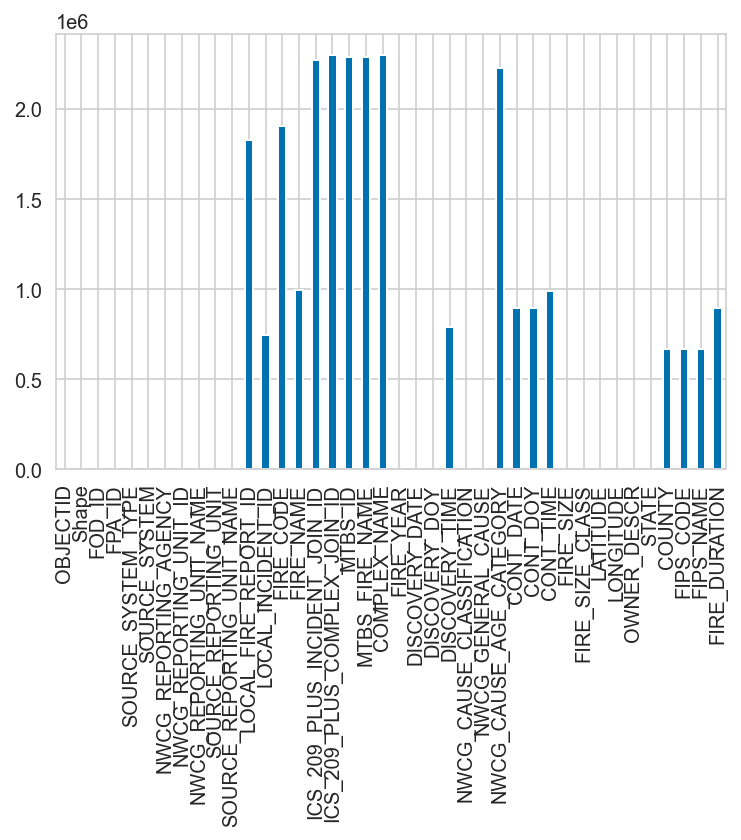

In [16]:
#show a bar graph for null values
df.isnull().sum().plot(kind='bar')

In [17]:
list(enumerate(df.columns))

[(0, 'OBJECTID'),
 (1, 'Shape'),
 (2, 'FOD_ID'),
 (3, 'FPA_ID'),
 (4, 'SOURCE_SYSTEM_TYPE'),
 (5, 'SOURCE_SYSTEM'),
 (6, 'NWCG_REPORTING_AGENCY'),
 (7, 'NWCG_REPORTING_UNIT_ID'),
 (8, 'NWCG_REPORTING_UNIT_NAME'),
 (9, 'SOURCE_REPORTING_UNIT'),
 (10, 'SOURCE_REPORTING_UNIT_NAME'),
 (11, 'LOCAL_FIRE_REPORT_ID'),
 (12, 'LOCAL_INCIDENT_ID'),
 (13, 'FIRE_CODE'),
 (14, 'FIRE_NAME'),
 (15, 'ICS_209_PLUS_INCIDENT_JOIN_ID'),
 (16, 'ICS_209_PLUS_COMPLEX_JOIN_ID'),
 (17, 'MTBS_ID'),
 (18, 'MTBS_FIRE_NAME'),
 (19, 'COMPLEX_NAME'),
 (20, 'FIRE_YEAR'),
 (21, 'DISCOVERY_DATE'),
 (22, 'DISCOVERY_DOY'),
 (23, 'DISCOVERY_TIME'),
 (24, 'NWCG_CAUSE_CLASSIFICATION'),
 (25, 'NWCG_GENERAL_CAUSE'),
 (26, 'NWCG_CAUSE_AGE_CATEGORY'),
 (27, 'CONT_DATE'),
 (28, 'CONT_DOY'),
 (29, 'CONT_TIME'),
 (30, 'FIRE_SIZE'),
 (31, 'FIRE_SIZE_CLASS'),
 (32, 'LATITUDE'),
 (33, 'LONGITUDE'),
 (34, 'OWNER_DESCR'),
 (35, 'STATE'),
 (36, 'COUNTY'),
 (37, 'FIPS_CODE'),
 (38, 'FIPS_NAME'),
 (39, 'FIRE_DURATION')]

In [18]:
#show the missing values for the dataframe
df.isnull().sum()

OBJECTID                               0
Shape                                  0
FOD_ID                                 0
FPA_ID                                 0
SOURCE_SYSTEM_TYPE                     0
SOURCE_SYSTEM                          0
NWCG_REPORTING_AGENCY                  0
NWCG_REPORTING_UNIT_ID                 0
NWCG_REPORTING_UNIT_NAME               0
SOURCE_REPORTING_UNIT                  0
SOURCE_REPORTING_UNIT_NAME             0
LOCAL_FIRE_REPORT_ID             1825891
LOCAL_INCIDENT_ID                 744411
FIRE_CODE                        1906254
FIRE_NAME                         995415
ICS_209_PLUS_INCIDENT_JOIN_ID    2270072
ICS_209_PLUS_COMPLEX_JOIN_ID     2298627
MTBS_ID                          2289696
MTBS_FIRE_NAME                   2289696
COMPLEX_NAME                     2297619
FIRE_YEAR                              0
DISCOVERY_DATE                         0
DISCOVERY_DOY                          0
DISCOVERY_TIME                    789095
NWCG_CAUSE_CLASS

In [19]:
df

,OBJECTID,Shape,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,LOCAL_INCIDENT_ID,FIRE_CODE,FIRE_NAME,ICS_209_PLUS_INCIDENT_JOIN_ID,ICS_209_PLUS_COMPLEX_JOIN_ID,MTBS_ID,MTBS_FIRE_NAME,COMPLEX_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,NWCG_CAUSE_CLASSIFICATION,NWCG_GENERAL_CAUSE,NWCG_CAUSE_AGE_CATEGORY,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,FIRE_DURATION
0,1,b'\x00\x01\xad\x10\x00\x00\xc8\xce\n[_@^\xc0\x...,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,511,Plumas National Forest,1,PNF-47,BJ8K,FOUNTAIN,NaN,NaN,NaN,NaN,NaN,2005,2/2/2005,33,1300.0,Human,Power generation/transmission/distribution,NaN,2/2/2005,33.0,1730.0,0.10,A,40.036944,-121.005833,USFS,CA,63.0,6063.0,Plumas County,0.0
1,2,b'\x00\x01\xad\x10\x00\x00\xc8\xe594\xe2\x19^\...,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,13,13,AAC0,PIGEON,NaN,NaN,NaN,NaN,NaN,2004,5/12/2004,133,845.0,Natural,Natural,NaN,5/12/2004,133.0,1530.0,0.25,A,38.933056,-120.404444,USFS,CA,61.0,6061.0,Placer County,0.0
2,3,b'\x00\x01\xad\x10\x00\x00x{\xac \x13/^\xc0@\x...,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,27,021,A32W,SLACK,NaN,NaN,NaN,NaN,NaN,2004,5/31/2004,152,1921.0,Human,Debris and open burning,NaN,5/31/2004,152.0,2024.0,0.10,A,38.984167,-120.735556,STATE OR PRIVATE,CA,17.0,6017.0,El Dorado County,0.0
3,4,b'\x00\x01\xad\x10\x00\x00\xc8\x13u\xd7s\xfa]\...,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,43,6,NaN,DEER,NaN,NaN,NaN,NaN,NaN,2004,6/28/2004,180,1600.0,Natural,Natural,NaN,7/3/2004,185.0,1400.0,0.10,A,38.559167,-119.913333,USFS,CA,3.0,6003.0,Alpine County,5.0
4,5,b'\x00\x01\xad\x10\x00\x00\xd0\x11y\xf8\xb6\xf...,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,44,7,NaN,STEVENOT,NaN,NaN,NaN,NaN,NaN,2004,6/28/2004,180,1600.0,Natural,Natural,NaN,7/3/2004,185.0,1200.0,0.10,A,38.559167,-119.933056,USFS,CA,3.0,6003.0,Alpine County,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2303561,2303562,b'\x00\x01\xad\x10\x00\x00\xcc\x9a\xedDh=[\xc0...,400732978,ICS209_2020_11710294,INTERAGCY,IA-ICS209,BLM,USCOGRD,Grand Junction Field Office,COGRD,Grand Junction Field Office,NaN,105,NaN,JONES,2020_11710294_JONES,NaN,NaN,NaN,NaN,2020,6/5/2020,157,1741.0,Natural,Natural,NaN,NaN,NaN,NaN,1.00,B,39.037890,-108.959500,MISSING/NOT SPECIFIED,CO,NaN,NaN,NaN,NaN
2303562,2303563,b'\x00\x01\xad\x10\x00\x00\xe8\x11\xda\xda1\xe...,400732979,ICS209_2020_11781527,INTERAGCY,IA-ICS209,ST/C&L,USCAMMU,Merced-Mariposa Unit,CAMMU,Merced-Mariposa Unit,NaN,14707,NaN,POWER,2020_11781527_POWER,NaN,NaN,NaN,NaN,2020,7/11/2020,193,1958.0,Missing data/not specified/undetermined,Missing data/not specified/undetermined,NaN,NaN,NaN,NaN,100.00,D,37.148611,-119.503056,Private,CA,Madera,6039.0,Madera County,NaN
2303563,2303564,b'\x00\x01\xad\x10\x00\x00P\xf6\xa7\x9eV\x9c\\...,400732980,ICS209_2020_11815219,INTERAGCY,IA-ICS209,FS,USMTBRF,Bitterroot National Forest,MTBRF,Bitterroot National Forest,NaN,20179,NaN,12 MILE,2020_11815219_12 MILE,NaN,NaN,NaN,NaN,2020,8/27/2020,240,1911.0,Natural,Natural,NaN,NaN,NaN,NaN,50.00,C,46.151370,-114.442800,MISSING/NOT SPECIFIED,MT,NaN,NaN,NaN,NaN
2303564,2303565,b'\x00\x01\xad\x10\x00\x00\\\x87\xc8\xbbS\x07^...,400732982,ICS209_2020_11831809,INTERAGCY,IA-ICS209,FWS,USWAMCR,Mid Columbia National Wildlife Refuge Complex,WAMCR,Mid Columbia National Wildlife Refuge Complex,NaN,508,NaN,TAYLOR POND,2020_11831809_TAYLOR POND,NaN,WA4667012011520200817,TAYLOR POND,NaN,2020,8/17/2020,230,755.0,Natural,Natural,NaN,8/20/2020,233.0,1900.0,24892.00,G,46.67

In [20]:
#drop the local_fire_report_id column
df.drop(['LOCAL_FIRE_REPORT_ID','LOCAL_INCIDENT_ID', 'FIRE_CODE', 'FIRE_NAME', 'ICS_209_PLUS_INCIDENT_JOIN_ID', 'ICS_209_PLUS_COMPLEX_JOIN_ID', 'MTBS_ID', 'MTBS_FIRE_NAME', 'COMPLEX_NAME'], axis=1, inplace=True)

In [21]:
df

,OBJECTID,Shape,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,NWCG_CAUSE_CLASSIFICATION,NWCG_GENERAL_CAUSE,NWCG_CAUSE_AGE_CATEGORY,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,FIRE_DURATION
0,1,b'\x00\x01\xad\x10\x00\x00\xc8\xce\n[_@^\xc0\x...,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,511,Plumas National Forest,2005,2/2/2005,33,1300.0,Human,Power generation/transmission/distribution,NaN,2/2/2005,33.0,1730.0,0.10,A,40.036944,-121.005833,USFS,CA,63.0,6063.0,Plumas County,0.0
1,2,b'\x00\x01\xad\x10\x00\x00\xc8\xe594\xe2\x19^\...,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,2004,5/12/2004,133,845.0,Natural,Natural,NaN,5/12/2004,133.0,1530.0,0.25,A,38.933056,-120.404444,USFS,CA,61.0,6061.0,Placer County,0.0
2,3,b'\x00\x01\xad\x10\x00\x00x{\xac \x13/^\xc0@\x...,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,2004,5/31/2004,152,1921.0,Human,Debris and open burning,NaN,5/31/2004,152.0,2024.0,0.10,A,38.984167,-120.735556,STATE OR PRIVATE,CA,17.0,6017.0,El Dorado County,0.0
3,4,b'\x00\x01\xad\x10\x00\x00\xc8\x13u\xd7s\xfa]\...,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,2004,6/28/2004,180,1600.0,Natural,Natural,NaN,7/3/2004,185.0,1400.0,0.10,A,38.559167,-119.913333,USFS,CA,3.0,6003.0,Alpine County,5.0
4,5,b'\x00\x01\xad\x10\x00\x00\xd0\x11y\xf8\xb6\xf...,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,2004,6/28/2004,180,1600.0,Natural,Natural,NaN,7/3/2004,185.0,1200.0,0.10,A,38.559167,-119.933056,USFS,CA,3.0,6003.0,Alpine County,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2303561,2303562,b'\x00\x01\xad\x10\x00\x00\xcc\x9a\xedDh=[\xc0...,400732978,ICS209_2020_11710294,INTERAGCY,IA-ICS209,BLM,USCOGRD,Grand Junction Field Office,COGRD,Grand Junction Field Office,2020,6/5/2020,157,1741.0,Natural,Natural,NaN,NaN,NaN,NaN,1.00,B,39.037890,-108.959500,MISSING/NOT SPECIFIED,CO,NaN,NaN,NaN,NaN
2303562,2303563,b'\x00\x01\xad\x10\x00\x00\xe8\x11\xda\xda1\xe...,400732979,ICS209_2020_11781527,INTERAGCY,IA-ICS209,ST/C&L,USCAMMU,Merced-Mariposa Unit,CAMMU,Merced-Mariposa Unit,2020,7/11/2020,193,1958.0,Missing data/not specified/undetermined,Missing data/not specified/undetermined,NaN,NaN,NaN,NaN,100.00,D,37.148611,-119.503056,Private,CA,Madera,6039.0,Madera County,NaN
2303563,2303564,b'\x00\x01\xad\x10\x00\x00P\xf6\xa7\x9eV\x9c\\...,400732980,ICS209_2020_11815219,INTERAGCY,IA-ICS209,FS,USMTBRF,Bitterroot National Forest,MTBRF,Bitterroot National Forest,2020,8/27/2020,240,1911.0,Natural,Natural,NaN,NaN,NaN,NaN,50.00,C,46.151370,-114.442800,MISSING/NOT SPECIFIED,MT,NaN,NaN,NaN,NaN
2303564,2303565,b'\x00\x01\xad\x10\x00\x00\\\x87\xc8\xbbS\x07^...,400732982,ICS209_2020_11831809,INTERAGCY,IA-ICS209,FWS,USWAMCR,Mid Columbia National Wildlife Refuge Complex,WAMCR,Mid Columbia National Wildlife Refuge Complex,2020,8/17/2020,230,755.0,Natural,Natural,NaN,8/20/2020,233.0,1900.0,24892.00,G,46.670340,-120.114500,UNDEFINED FEDERAL,WA,Yakima,53077.0,Yakima County,3.0


In [22]:
#show the value counts for FIRE_DURATION
df['FIRE_DURATION'].value_counts()

 0.0      1174725
 1.0       129660
 2.0        31762
 3.0        16325
 4.0         9284
           ...   
 277.0          1
-61.0           1
-138.0          1
-136.0          1
 298.0          1
Name: FIRE_DURATION, Length: 349, dtype: int64

In [23]:
#make a groupby to show the top 10 fire durations
dur = df.groupby('FIRE_DURATION').size().sort_values(ascending=False).head(5)

<AxesSubplot:xlabel='FIRE_DURATION'>

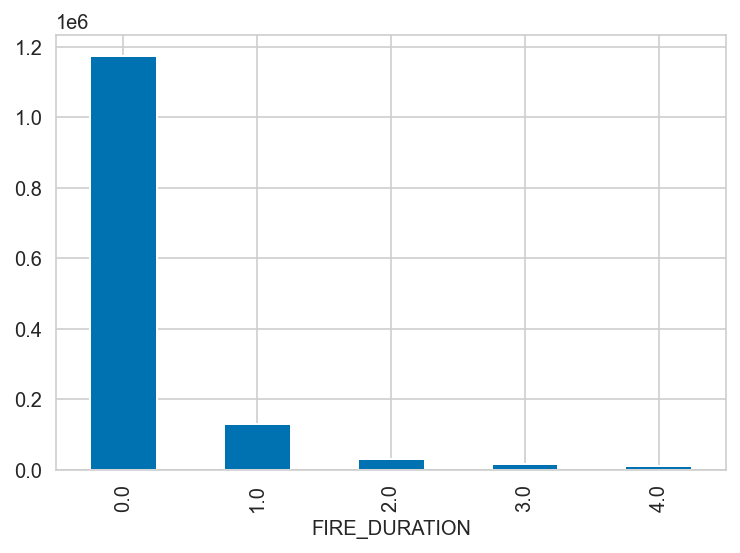

In [24]:
#visualize dur
dur.plot(kind='bar')


In [25]:
#SHOW THE HIGHEST FIRE DURATIONS
df.sort_values(by='FIRE_DURATION', ascending=False).head(10)

,OBJECTID,Shape,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,NWCG_CAUSE_CLASSIFICATION,NWCG_GENERAL_CAUSE,NWCG_CAUSE_AGE_CATEGORY,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,FIRE_DURATION
2172140,2172141,b'\x00\x01\xad\x10\x00\x00f\n|\xc9\xff\xa7a\xc...,400505448,W-736797,FED,DOI-WFMI,BLM,USAKASO,Alaska State Office,AKAFS,Alaska Fire Service,2019,1/1/2019,1,1.0,Natural,Natural,NaN,12/31/2019,365.0,2359.0,0.1,A,65.026700,-141.250000,TRIBAL,AK,Southeast Fairbanks,2240.0,Southeast Fairbanks Census Area,364.0
2051411,2051412,b'\x00\x01\xad\x10\x00\x00\xfc\xfa\xa2\xb6\r\x...,400305756,W-715620,FED,DOI-WFMI,BLM,USAKAKD,Alaska Fire Service,AKAFS,Alaska Fire Service,2018,1/1/2018,1,1.0,Natural,Natural,NaN,12/31/2018,365.0,2359.0,19.8,C,65.029700,-141.251700,TRIBAL,AK,Fairbanks North Star,2090.0,Fairbanks North Star Borough,364.0
1901595,1901596,b'\x00\x01\xad\x10\x00\x00\x0c d\xd5w\xdbY\xc0...,400023088,W-715070,FED,DOI-WFMI,NPS,USNDTRP,Theodore Roosevelt National Park,NDTRP,THEODORE ROOSEVELT NATIONAL PARK,2017,1/1/2017,1,1200.0,Natural,Natural,NaN,12/30/2017,364.0,1200.0,1.0,B,47.607200,-103.429200,NPS,ND,NaN,NaN,NaN,363.0
1901596,1901597,b'\x00\x01\xad\x10\x00\x00\xe4\x9ai\xc5\x8e\xd...,400023089,W-715071,FED,DOI-WFMI,NPS,USNDTRP,Theodore Roosevelt National Park,NDTRP,THEODORE ROOSEVELT NATIONAL PARK,2017,1/1/2017,1,1200.0,Natural,Natural,NaN,12/30/2017,364.0,1200.0,1.0,B,47.613900,-103.430600,NPS,ND,NaN,NaN,NaN,363.0
1901594,1901595,b'\x00\x01\xad\x10\x00\x00\xd4\xd5\x00\x7f\xfa...,400023087,W-715068,FED,DOI-WFMI,NPS,USNDTRP,Theodore Roosevelt National Park,NDTRP,THEODORE ROOSEVELT NATIONAL PARK,2017,1/1/2017,1,1200.0,Natural,Natural,NaN,12/20/2017,354.0,1200.0,1.0,B,47.612800,-103.390300,NPS,ND,NaN,NaN,NaN,353.0
317991,317992,b'\x00\x01\xad\x10\x00\x000\xec\xb1\xa6r\x84^\...,324660,W-562471,FED,DOI-WFMI,BLM,USCANOD,Northern California District,CANOD,Northern California District,2000,1/10/2000,10,1145.0,Human,Debris and open burning,NaN,12/10/2000,345.0,1200.0,0.2,A,38.496719,-122.069511,PRIVATE,CA,Solano,6095.0,Solano County,335.0
406704,406705,b'\x00\x01\xad\x10\x00\x00\xd8\xe2\xc6\x9f\xbb...,440653,SFO-2004FLFLS2004150032,NONFED,ST-NASF,ST/C&L,USFLFLS,Florida Forest Service,FLFLS,Florida Forest Service,2004,1/26/2004,26,1508.0,Human,Arson/incendiarism,NaN,12/26/2004,361.0,1552.0,1.5,B,27.018050,-82.245830,PRIVATE,FL,Charlotte,12015.0,Charlotte County,335.0
242740,242741,b'\x00\x01\xad\x10\x00\x00\x8cV\xa8zADT\xc0\x0...,247309,W-239520,FED,DOI-WFMI,NPS,USWVNRP,New River Gorge National River,WVNRP,New River Gorge National River,1993,2/2/1993,33,1130.0,Human,Debris and open burning,NaN,12/31/1993,365.0,2359.0,0.1,A,37.950100,-81.066500,PRIVATE,WV,NaN,NaN,NaN,332.0
1470945,1470946,"b""\x00\x01\xad\x10\x00\x00\xd8&W\xa9'\x91^\xc0...",201131486,ODF-90295,NONFED,ST-ORORS,ST/C&L,USOR582S,Santiam Unit,ORODF-582,Santiam Unit,2011,1/30/2011,30,NaN,Human,Arson/incendiarism,NaN,12/23/2011,357.0,NaN,5.0,B,44.712780,-122.268060,MISSING/NOT SPECIFIED,OR,22,41043.0,Linn County,327.0
291140,291141,b'\x00\x01\xad\x10\x00\x00\xe8\xf6\xa3\xf2`3X\...,296677,W-523938,FED,DOI-WFMI,BIA,USOKPAA,Pawnee Agency,OKPAA,Pawnee Agency,2006,1/1/2006,1,1111.0,Natural,Natural,NaN,11/11/2006,315.0,1111.0,1.0,B,36.336900,-96.802800,BIA,OK,NaN,NaN,NaN,314.0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2303566 entries, 0 to 2303565
Data columns (total 31 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   OBJECTID                    int64  
 1   Shape                       object 
 2   FOD_ID                      int64  
 3   FPA_ID                      object 
 4   SOURCE_SYSTEM_TYPE          object 
 5   SOURCE_SYSTEM               object 
 6   NWCG_REPORTING_AGENCY       object 
 7   NWCG_REPORTING_UNIT_ID      object 
 8   NWCG_REPORTING_UNIT_NAME    object 
 9   SOURCE_REPORTING_UNIT       object 
 10  SOURCE_REPORTING_UNIT_NAME  object 
 11  FIRE_YEAR                   int64  
 12  DISCOVERY_DATE              object 
 13  DISCOVERY_DOY               int64  
 14  DISCOVERY_TIME              float64
 15  NWCG_CAUSE_CLASSIFICATION   object 
 16  NWCG_GENERAL_CAUSE          object 
 17  NWCG_CAUSE_AGE_CATEGORY     object 
 18  CONT_DATE                   object 
 19  CONT_DOY             

In [27]:
#convert DISCOVERY_DATE to datetime
df['DISCOVERY_DATE'] = pd.to_datetime(df['DISCOVERY_DATE'], format='%m/%d/%Y')

In [28]:
#convert the CONT_DATE to datetime
df['CONT_DATE'] = pd.to_datetime(df['CONT_DATE'], format='%m/%d/%Y')

In [29]:
#calculate the difference between the CONT_DATE and DISCOVERY_DATE
df['FIRE_DURATION2'] = df['CONT_DATE']-df['DISCOVERY_DATE']

In [30]:
df

,OBJECTID,Shape,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,NWCG_CAUSE_CLASSIFICATION,NWCG_GENERAL_CAUSE,NWCG_CAUSE_AGE_CATEGORY,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,FIRE_DURATION,FIRE_DURATION2
0,1,b'\x00\x01\xad\x10\x00\x00\xc8\xce\n[_@^\xc0\x...,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,511,Plumas National Forest,2005,2005-02-02,33,1300.0,Human,Power generation/transmission/distribution,NaN,2005-02-02,33.0,1730.0,0.10,A,40.036944,-121.005833,USFS,CA,63.0,6063.0,Plumas County,0.0,0 days
1,2,b'\x00\x01\xad\x10\x00\x00\xc8\xe594\xe2\x19^\...,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,2004,2004-05-12,133,845.0,Natural,Natural,NaN,2004-05-12,133.0,1530.0,0.25,A,38.933056,-120.404444,USFS,CA,61.0,6061.0,Placer County,0.0,0 days
2,3,b'\x00\x01\xad\x10\x00\x00x{\xac \x13/^\xc0@\x...,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,2004,2004-05-31,152,1921.0,Human,Debris and open burning,NaN,2004-05-31,152.0,2024.0,0.10,A,38.984167,-120.735556,STATE OR PRIVATE,CA,17.0,6017.0,El Dorado County,0.0,0 days
3,4,b'\x00\x01\xad\x10\x00\x00\xc8\x13u\xd7s\xfa]\...,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,2004,2004-06-28,180,1600.0,Natural,Natural,NaN,2004-07-03,185.0,1400.0,0.10,A,38.559167,-119.913333,USFS,CA,3.0,6003.0,Alpine County,5.0,5 days
4,5,b'\x00\x01\xad\x10\x00\x00\xd0\x11y\xf8\xb6\xf...,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,2004,2004-06-28,180,1600.0,Natural,Natural,NaN,2004-07-03,185.0,1200.0,0.10,A,38.559167,-119.933056,USFS,CA,3.0,6003.0,Alpine County,5.0,5 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2303561,2303562,b'\x00\x01\xad\x10\x00\x00\xcc\x9a\xedDh=[\xc0...,400732978,ICS209_2020_11710294,INTERAGCY,IA-ICS209,BLM,USCOGRD,Grand Junction Field Office,COGRD,Grand Junction Field Office,2020,2020-06-05,157,1741.0,Natural,Natural,NaN,NaT,NaN,NaN,1.00,B,39.037890,-108.959500,MISSING/NOT SPECIFIED,CO,NaN,NaN,NaN,NaN,NaT
2303562,2303563,b'\x00\x01\xad\x10\x00\x00\xe8\x11\xda\xda1\xe...,400732979,ICS209_2020_11781527,INTERAGCY,IA-ICS209,ST/C&L,USCAMMU,Merced-Mariposa Unit,CAMMU,Merced-Mariposa Unit,2020,2020-07-11,193,1958.0,Missing data/not specified/undetermined,Missing data/not specified/undetermined,NaN,NaT,NaN,NaN,100.00,D,37.148611,-119.503056,Private,CA,Madera,6039.0,Madera County,NaN,NaT
2303563,2303564,b'\x00\x01\xad\x10\x00\x00P\xf6\xa7\x9eV\x9c\\...,400732980,ICS209_2020_11815219,INTERAGCY,IA-ICS209,FS,USMTBRF,Bitterroot National Forest,MTBRF,Bitterroot National Forest,2020,2020-08-27,240,1911.0,Natural,Natural,NaN,NaT,NaN,NaN,50.00,C,46.151370,-114.442800,MISSING/NOT SPECIFIED,MT,NaN,NaN,NaN,NaN,NaT
2303564,2303565,b'\x00\x01\xad\x10\x00\x00\\\x87\xc8\xbbS\x07^...,400732982,ICS209_2020_11831809,INTERAGCY,IA-ICS209,FWS,USWAMCR,Mid Columbia National Wildlife Refuge Complex,WAMCR,Mid Columbia National Wildlife Refuge Complex,2020,2020-08-17,230,755.0,Natural,Natural,NaN,2020-08-20,233.0,1900.0,24892.00,G,46.670340,-120.114500,UNDEFINED FEDERAL,WA,Yakima,53077.0,Yakima County,3.0,3 days


In [31]:
#show row 467
df.iloc[467]

OBJECTID                                                                    468
Shape                         b'\x00\x01\xad\x10\x00\x00\x98\x1b\xefh%\x7fW\...
FOD_ID                                                                      475
FPA_ID                                                               FS-1419888
SOURCE_SYSTEM_TYPE                                                          FED
SOURCE_SYSTEM                                                       FS-FIRESTAT
NWCG_REPORTING_AGENCY                                                        FS
NWCG_REPORTING_UNIT_ID                                                  USMNCPF
NWCG_REPORTING_UNIT_NAME                               Chippewa National Forest
SOURCE_REPORTING_UNIT                                                       903
SOURCE_REPORTING_UNIT_NAME                             Chippewa National Forest
FIRE_YEAR                                                                  2005
DISCOVERY_DATE                          

In [32]:
#show the min and max of the FIRE_DURATION2 column
df['FIRE_DURATION2'].min(), df['FIRE_DURATION2'].max()

(Timedelta('0 days 00:00:00'), Timedelta('364 days 00:00:00'))

In [33]:
#visualize the longest fires
df.sort_values(by='FIRE_DURATION2', ascending=False).head(10)

,OBJECTID,Shape,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,NWCG_CAUSE_CLASSIFICATION,NWCG_GENERAL_CAUSE,NWCG_CAUSE_AGE_CATEGORY,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,FIRE_DURATION,FIRE_DURATION2
2172140,2172141,b'\x00\x01\xad\x10\x00\x00f\n|\xc9\xff\xa7a\xc...,400505448,W-736797,FED,DOI-WFMI,BLM,USAKASO,Alaska State Office,AKAFS,Alaska Fire Service,2019,2019-01-01,1,1.0,Natural,Natural,NaN,2019-12-31,365.0,2359.0,0.10,A,65.026700,-141.250000,TRIBAL,AK,Southeast Fairbanks,2240.0,Southeast Fairbanks Census Area,364.0,364 days
2051411,2051412,b'\x00\x01\xad\x10\x00\x00\xfc\xfa\xa2\xb6\r\x...,400305756,W-715620,FED,DOI-WFMI,BLM,USAKAKD,Alaska Fire Service,AKAFS,Alaska Fire Service,2018,2018-01-01,1,1.0,Natural,Natural,NaN,2018-12-31,365.0,2359.0,19.80,C,65.029700,-141.251700,TRIBAL,AK,Fairbanks North Star,2090.0,Fairbanks North Star Borough,364.0,364 days
2046471,2046472,"b'\x00\x01\xad\x10\x00\x00\x84N\x04\xaea""[\xc0...",400300764,FS-6917646,FED,FS-FIRESTAT,FS,USNMGNF,Gila National Forest,0306,Gila National Forest,2018,2018-05-22,142,1500.0,Human,Recreation and ceremony,NaN,2019-05-21,141.0,1200.0,50296.00,G,33.723611,-108.537222,USFS,NM,003,35003.0,Catron County,-1.0,364 days
1901595,1901596,b'\x00\x01\xad\x10\x00\x00\x0c d\xd5w\xdbY\xc0...,400023088,W-715070,FED,DOI-WFMI,NPS,USNDTRP,Theodore Roosevelt National Park,NDTRP,THEODORE ROOSEVELT NATIONAL PARK,2017,2017-01-01,1,1200.0,Natural,Natural,NaN,2017-12-30,364.0,1200.0,1.00,B,47.607200,-103.429200,NPS,ND,NaN,NaN,NaN,363.0,363 days
1901596,1901597,b'\x00\x01\xad\x10\x00\x00\xe4\x9ai\xc5\x8e\xd...,400023089,W-715071,FED,DOI-WFMI,NPS,USNDTRP,Theodore Roosevelt National Park,NDTRP,THEODORE ROOSEVELT NATIONAL PARK,2017,2017-01-01,1,1200.0,Natural,Natural,NaN,2017-12-30,364.0,1200.0,1.00,B,47.613900,-103.430600,NPS,ND,NaN,NaN,NaN,363.0,363 days
2229770,2229771,b'\x00\x01\xad\x10\x00\x00\xc4\x116\xff9%X\xc0...,400567060,SFO-2019KSKSS20190002549,NONFED,ST-NASF,ST/C&L,USKSKSS,Kansas Forest Service,KSKSS,Kansas State Forestry (PBC Area),2019,2019-11-26,330,1743.0,Human,Missing data/not specified/undetermined,NaN,2020-11-16,321.0,1818.0,0.01,A,37.534601,-96.581673,MISSING/NOT SPECIFIED,KS,Butler,20015.0,Butler County,-9.0,356 days
2229769,2229770,b'\x00\x01\xad\x10\x00\x00\xa8\xa5\x8d\xde\xe1...,400567059,SFO-2019KSKSS20190001207,NONFED,ST-NASF,ST/C&L,USKSKSS,Kansas Forest Service,KSKSS,Kansas State Forestry (PBC Area),2019,2019-11-26,330,1631.0,Human,Debris and open burning,NaN,2020-11-13,318.0,1941.0,20.00,C,37.442553,-97.232544,MISSING/NOT SPECIFIED,KS,Sumner,20191.0,Sumner County,-12.0,353 days
1901594,1901595,b'\x00\x01\xad\x10\x00\x00\xd4\xd5\x00\x7f\xfa...,400023087,W-715068,FED,DOI-WFMI,NPS,USNDTRP,Theodore Roosevelt National Park,NDTRP,THEODORE ROOSEVELT NATIONAL PARK,2017,2017-01-01,1,1200.0,Natural,Natural,NaN,2017-12-20,354.0,1200.0,1.00,B,47.612800,-103.390300,NPS,ND,NaN,NaN,NaN,353.0,353 days
1895493,1895494,b'\x00\x01\xad\x10\x00\x00\xb4\xd8\xf9&IuZ\xc0...,400016827,W-699415,FED,DOI-WFMI,BLM,USCOCCD,Front Range District Office,COCCD,Front Range Center,2016,2016-07-08,190,1753.0,Natural,Natural,NaN,2017-06-19,170.0,900.0,16562.00,G,38.292100,-105.832600,USFS,CO,Fremont,8043.0,Fremont County,-20.0,346 days
1285173,1285174,b'\x00\x01\xad\x10\x00\x00\xb8\xa0\xec\x9d\xb9...,1756841,SFO-2010-WYWSFD8390,NONFED,ST-NASF,ST/C&L,USWYWYS,Wyoming State Forestry,WYWSFD,Wyoming State Forestry,2010,2010-07-18,199,1300.0,Human,Equipment and vehicle use,NaN,2011-06-29,180.0,1630.0,0.10,A,44.293630,-105.448840,PRIVATE,WY,Campbell,56005.0,Campbell County,-19.0,346 days


#make a gr

In [34]:
#show the number of fires with a duration greater than 300 days
df[df['FIRE_DURATION2']>'300 days']

,OBJECTID,Shape,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,NWCG_CAUSE_CLASSIFICATION,NWCG_GENERAL_CAUSE,NWCG_CAUSE_AGE_CATEGORY,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,FIRE_DURATION,FIRE_DURATION2
193087,193088,b'\x00\x01\xad\x10\x00\x00l5\xffp\xd6\xdcZ\xc0...,195742,W-357722,FED,DOI-WFMI,BIA,USMTCRA,Crow Agency,MTCRA,Crow Agency,1992,1992-02-21,52,1245.0,Human,Debris and open burning,NaN,1992-12-21,356.0,1330.0,0.10,A,45.600000,-107.450600,BIA,MT,NaN,NaN,NaN,304.0,304 days
242740,242741,b'\x00\x01\xad\x10\x00\x00\x8cV\xa8zADT\xc0\x0...,247309,W-239520,FED,DOI-WFMI,NPS,USWVNRP,New River Gorge National River,WVNRP,New River Gorge National River,1993,1993-02-02,33,1130.0,Human,Debris and open burning,NaN,1993-12-31,365.0,2359.0,0.10,A,37.950100,-81.066500,PRIVATE,WV,NaN,NaN,NaN,332.0,332 days
248439,248440,b'\x00\x01\xad\x10\x00\x00\xc4\x0b\xa8\x8b\x82...,253382,W-584031,FED,DOI-WFMI,TRIBE,USOKCNA,Cherokee Nation Tribe,OKCNA,Cherokee Nation Tribe,2009,2009-01-17,17,1245.0,Human,Arson/incendiarism,NaN,2009-11-17,321.0,1500.0,100.00,D,35.700600,-94.523600,BIA,OK,NaN,NaN,NaN,304.0,304 days
291140,291141,b'\x00\x01\xad\x10\x00\x00\xe8\xf6\xa3\xf2`3X\...,296677,W-523938,FED,DOI-WFMI,BIA,USOKPAA,Pawnee Agency,OKPAA,Pawnee Agency,2006,2006-01-01,1,1111.0,Natural,Natural,NaN,2006-11-11,315.0,1111.0,1.00,B,36.336900,-96.802800,BIA,OK,NaN,NaN,NaN,314.0,314 days
317991,317992,b'\x00\x01\xad\x10\x00\x000\xec\xb1\xa6r\x84^\...,324660,W-562471,FED,DOI-WFMI,BLM,USCANOD,Northern California District,CANOD,Northern California District,2000,2000-01-10,10,1145.0,Human,Debris and open burning,NaN,2000-12-10,345.0,1200.0,0.20,A,38.496719,-122.069511,PRIVATE,CA,Solano,6095.0,Solano County,335.0,335 days
358661,358662,b'\x00\x01\xad\x10\x00\x00\xf8\x90\xeaMB\xeaT\...,368907,W-224797,FED,DOI-WFMI,NPS,USTNGSP,Great Smoky Mountains National Park,TNGSP,Great Smoky Mountains National Park,2003,2003-02-12,43,1500.0,Human,Debris and open burning,NaN,2003-12-13,347.0,2130.0,0.60,B,35.724747,-83.660301,NPS,TN,NaN,NaN,NaN,304.0,304 days
365845,365846,b'\x00\x01\xad\x10\x00\x00\x1cn\xbaw\xca\x92T\...,377163,FWS-2002GAOKR4722,FED,FWS-FMIS,FWS,USGAOKR,Okefenokee National Wildlife Refuge,GAOKR,Okefenokee National Wildlife Refuge,2002,2002-05-03,123,1200.0,Natural,Natural,NaN,2003-03-11,70.0,1500.0,124110.00,G,30.668889,-82.293611,FWS,GA,NaN,NaN,NaN,-53.0,312 days
406704,406705,b'\x00\x01\xad\x10\x00\x00\xd8\xe2\xc6\x9f\xbb...,440653,SFO-2004FLFLS2004150032,NONFED,ST-NASF,ST/C&L,USFLFLS,Florida Forest Service,FLFLS,Florida Forest Service,2004,2004-01-26,26,1508.0,Human,Arson/incendiarism,NaN,2004-12-26,361.0,1552.0,1.50,B,27.018050,-82.245830,PRIVATE,FL,Charlotte,12015.0,Charlotte County,335.0,335 days
1127606,1127607,b'\x00\x01\xad\x10\x00\x00\xc0\x02\x9c4f6]\xc0...,1375290,SFO-2001CACDFMVU001112,NONFED,ST-CACDF,ST/C&L,USCAMVU,San Diego Unit,CAMVU,CDF - Monte Vista Unit,2001,2001-02-21,52,1200.0,Human,Missing data/not specified/undetermined,NaN,2001-12-21,355.0,1210.0,0.30,B,33.043889,-116.850000,MISSING/NOT SPECIFIED,CA,SAN DIEGO,6073.0,San Diego County,303.0,303 days
1182677,1182678,b'\x00\x01\xad\x10\x00\x00\xb4\x0b\xbeJ-\xa5[\...,1435061,SFO-2009-AZAZS-AZ-090018,NONFED,ST-NASF,ST/C&L,USAZAZS,Arizona Department of Forestry and Fire Manage...,AZAZS,Arizona State Forestry Division - State Office,2009,2009-01-24,24,1230.0,Human,Missing data/not specified/undetermined,NaN,2009-11-24,328.0,1320.0,11.00,C,31.608000,-110.580900,MISSING/NOT SPECIFIED,AZ,NaN,NaN,NaN,304.0,304 days


In [35]:
#show the value counts of the number of fires greater than 300 days
df[df['FIRE_DURATION2']>'300 days']['FIRE_DURATION2'].value_counts()

304 days    6
364 days    3
363 days    2
335 days    2
303 days    2
346 days    2
353 days    2
356 days    1
321 days    1
305 days    1
307 days    1
327 days    1
332 days    1
343 days    1
329 days    1
312 days    1
314 days    1
302 days    1
Name: FIRE_DURATION2, dtype: int64

In [36]:
#show the value counts of the number of fires per year
df['DISCOVERY_DATE'].dt.year.value_counts()

2006    117944
2011     98903
2007     98832
2000     96396
2005     92920
1999     89350
2008     88322
2001     87001
2010     85578
2017     82279
2016     81993
2009     81477
2018     80860
2015     77275
2002     76128
1994     75935
1996     75561
2012     74258
2020     73262
1995     71440
2014     70480
2004     69371
1998     68356
2003     68279
1992     67961
2013     66434
2019     63557
1993     61972
1997     61442
Name: DISCOVERY_DATE, dtype: int64

<AxesSubplot:>

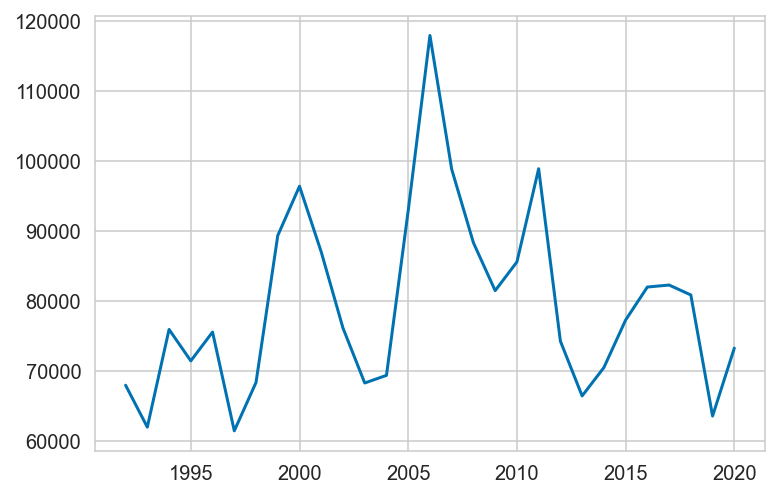

In [37]:
#make a line graph of the number of fires per year over time
df['DISCOVERY_DATE'].dt.year.value_counts().sort_index().plot(kind='line')


<AxesSubplot:>

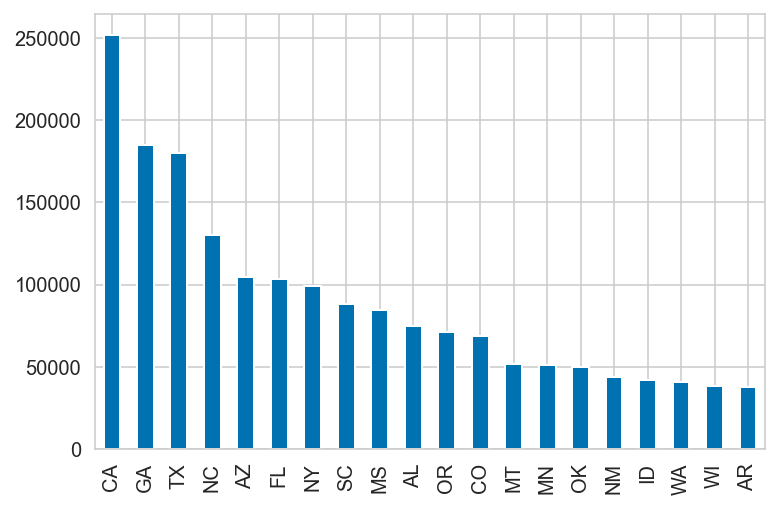

In [38]:
#make a graph of the top 10 states with the most fires
df['STATE'].value_counts().head(20).plot(kind='bar')

<AxesSubplot:xlabel='STATE'>

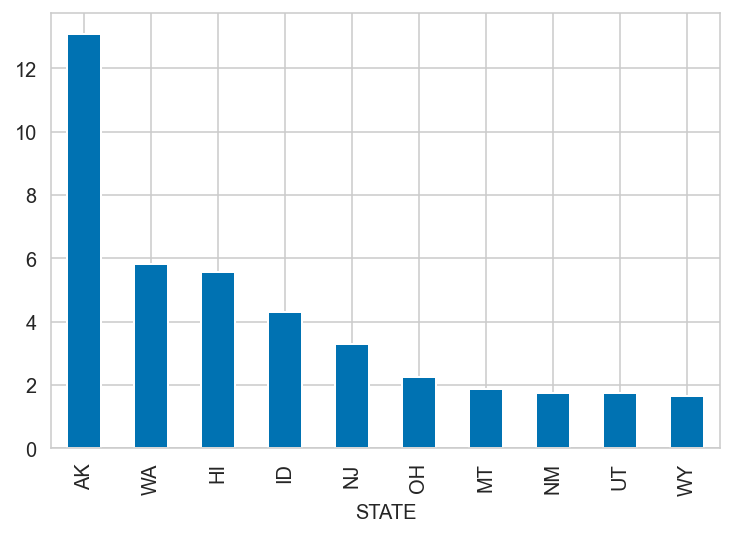

In [39]:
#make a graph showing the average duration of fires per state
df.groupby('STATE')['FIRE_DURATION'].mean().sort_values(ascending=False).head(10).plot(kind='bar')

In [40]:
#show which states had the most fires by class size
df.groupby('STATE')['FIRE_SIZE_CLASS'].value_counts().sort_values(ascending=False).head(20)

STATE  FIRE_SIZE_CLASS
CA     A                  138489
GA     B                  115766
TX     B                  114817
CA     B                   96162
AZ     A                   70858
NC     B                   70326
SC     B                   61222
FL     B                   59242
NY     A                   59195
GA     A                   53495
MS     B                   52959
CO     A                   52821
OR     A                   50792
NC     A                   50416
AL     B                   43667
NY     B                   39206
TX     C                   30479
MT     A                   29826
MN     B                   27975
AZ     B                   26965
Name: FIRE_SIZE_CLASS, dtype: int64

In [41]:
#show which states had fire class sizes of E, F, or G
df[df['FIRE_SIZE_CLASS'].isin(['E','F','G'])]['STATE'].value_counts().head(10)

TX    3475
CA    2873
ID    2223
OK    2188
FL    1836
AK    1791
NM    1701
AZ    1543
MT    1455
NV    1370
Name: STATE, dtype: int64

In [42]:
#show the value counts of  states that had fire class sizes of E, F, or G
df[df['FIRE_SIZE_CLASS'].isin(['E','F','G'])]['STATE'].value_counts()

TX    3475
CA    2873
ID    2223
OK    2188
FL    1836
AK    1791
NM    1701
AZ    1543
MT    1455
NV    1370
OR    1290
UT    1180
WA     891
SD     780
CO     728
WY     727
KY     669
KS     521
MN     514
WV     419
MS     333
AL     304
NE     301
LA     277
MO     270
TN     258
ND     243
NC     236
AR     199
VA     193
GA     188
HI     157
SC     117
NJ      69
MD      65
PR      56
IA      46
MI      39
PA      36
WI      35
NY      23
IN      11
OH      10
ME       7
IL       7
MA       5
DE       3
CT       3
NH       1
Name: STATE, dtype: int64

<AxesSubplot:xlabel='STATE'>

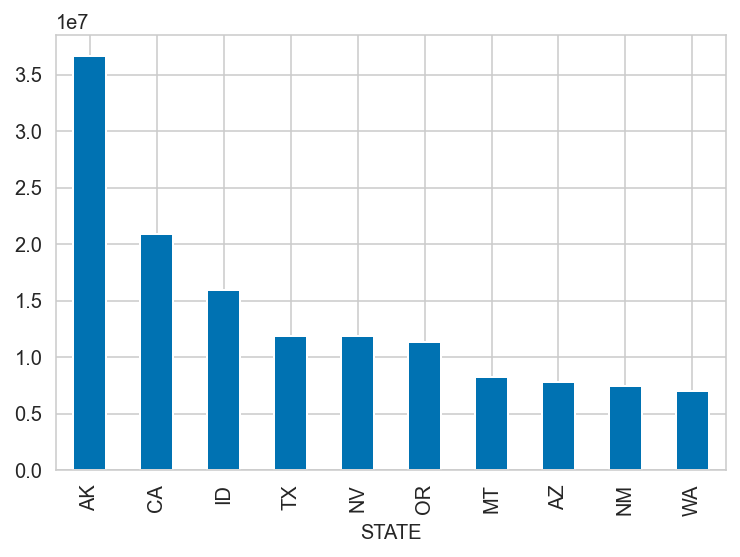

In [43]:
#make a graph of the top 10 states with the most area destroyed by fires
df.groupby('STATE')['FIRE_SIZE'].sum().sort_values(ascending=False).head(10).plot(kind='bar')

<AxesSubplot:xlabel='STATE'>

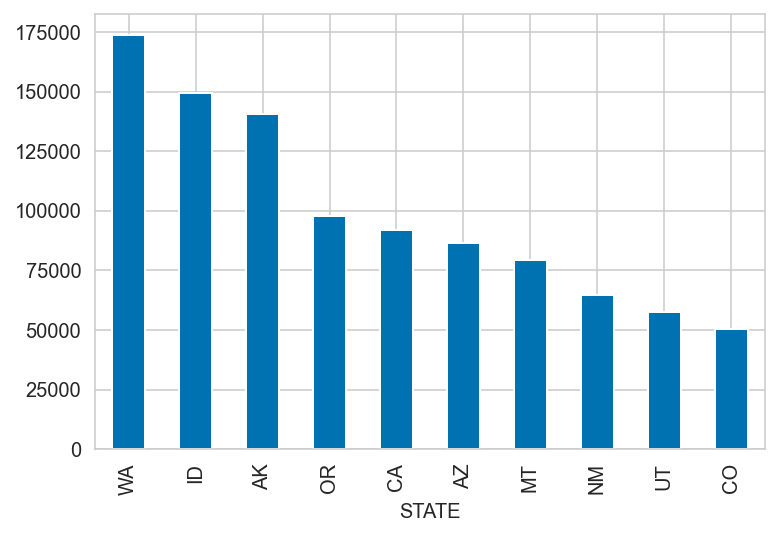

In [44]:
#show the top 10 states with the longest duration of fires
df.groupby('STATE')['FIRE_DURATION'].sum().sort_values(ascending=False).head(10).plot(kind='bar')

<AxesSubplot:xlabel='DISCOVERY_DATE'>

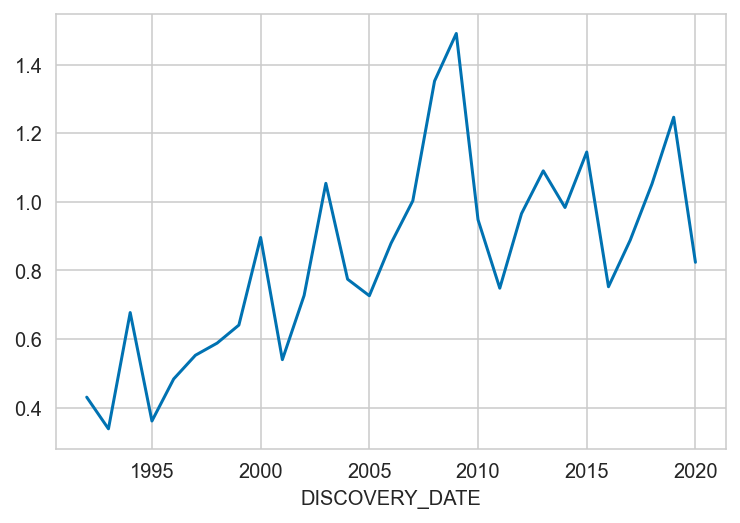

In [45]:
#show the average duration of fires over time
df.groupby(df['DISCOVERY_DATE'].dt.year)['FIRE_DURATION'].mean().plot(kind='line')

In [46]:
#show the value counts for NWCG_GENERAL_CAUSE
df['NWCG_GENERAL_CAUSE'].value_counts()

Missing data/not specified/undetermined       597933
Debris and open burning                       535851
Natural                                       327319
Arson/incendiarism                            320814
Equipment and vehicle use                     190319
Recreation and ceremony                        99473
Misuse of fire by a minor                      66280
Smoking                                        63783
Railroad operations and maintenance            37292
Power generation/transmission/distribution     32652
Fireworks                                      18599
Other causes                                   10517
Firearms and explosives use                     2734
Name: NWCG_GENERAL_CAUSE, dtype: int64

In [47]:
df['NWCG_GENERAL_CAUSE'].value_counts(normalize=True)

Missing data/not specified/undetermined       0.259568
Debris and open burning                       0.232618
Natural                                       0.142092
Arson/incendiarism                            0.139268
Equipment and vehicle use                     0.082619
Recreation and ceremony                       0.043182
Misuse of fire by a minor                     0.028773
Smoking                                       0.027689
Railroad operations and maintenance           0.016189
Power generation/transmission/distribution    0.014175
Fireworks                                     0.008074
Other causes                                  0.004566
Firearms and explosives use                   0.001187
Name: NWCG_GENERAL_CAUSE, dtype: float64

<AxesSubplot:>

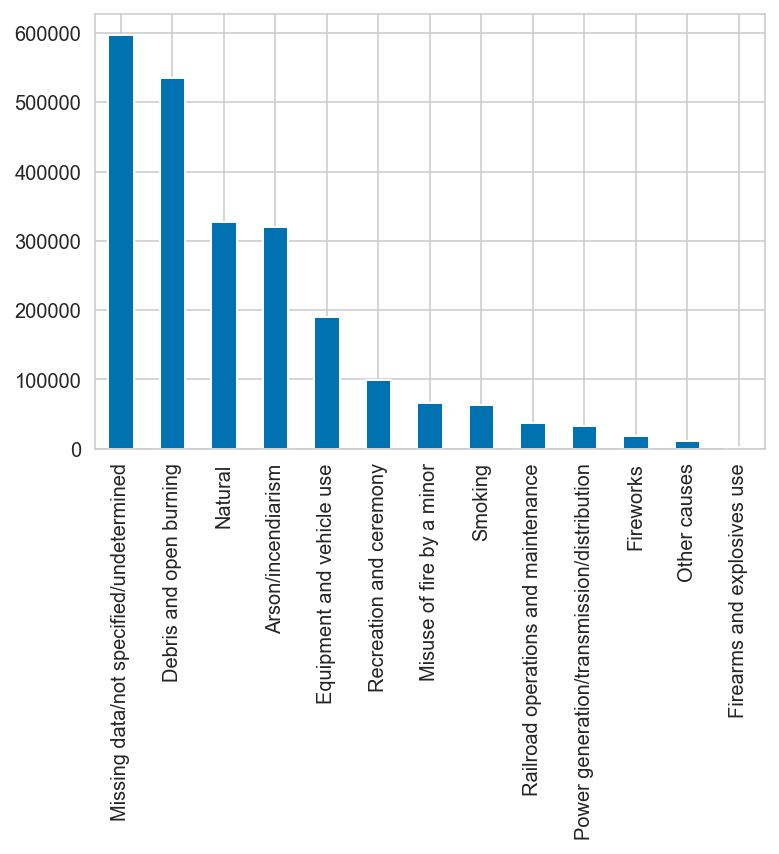

In [48]:
#show a stacked bar graph of the value counts for NWCG_GENERAL_CAUSE
df['NWCG_GENERAL_CAUSE'].value_counts().plot(kind='bar', stacked=True)

In [49]:
#show the percentages of the value counts for NWCG_GENERAL_CAUSE
df['NWCG_GENERAL_CAUSE'].value_counts(normalize=True)

Missing data/not specified/undetermined       0.259568
Debris and open burning                       0.232618
Natural                                       0.142092
Arson/incendiarism                            0.139268
Equipment and vehicle use                     0.082619
Recreation and ceremony                       0.043182
Misuse of fire by a minor                     0.028773
Smoking                                       0.027689
Railroad operations and maintenance           0.016189
Power generation/transmission/distribution    0.014175
Fireworks                                     0.008074
Other causes                                  0.004566
Firearms and explosives use                   0.001187
Name: NWCG_GENERAL_CAUSE, dtype: float64

In [50]:
#show the value counts of FIRE_YEAR
df['FIRE_YEAR'].value_counts()

2006    117943
2011     98903
2007     98837
2000     96396
2005     92921
1999     89350
2008     88306
2001     87001
2010     85579
2017     82279
2016     81993
2009     81492
2018     80860
2015     77275
2002     76128
1994     75932
1996     75561
2012     74258
2020     73262
1995     71440
2014     70480
2004     69370
1998     68356
2003     68275
1992     67961
2013     66434
2019     63557
1993     61975
1997     61442
Name: FIRE_YEAR, dtype: int64

<AxesSubplot:>

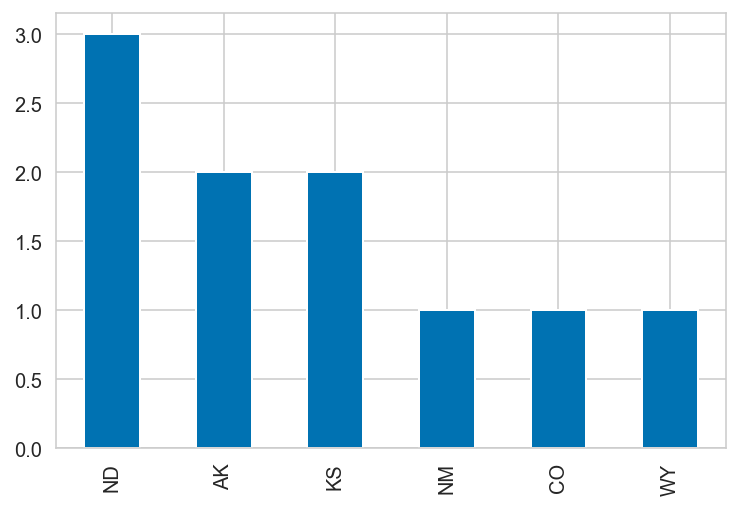

In [51]:
#make a graph showing the states of the 10 longest burning fires
df.sort_values(by='FIRE_DURATION2', ascending=False).head(10)['STATE'].value_counts().plot(kind='bar')

In [52]:
#show the value counts of FIRE_SIZE_CLASS
df['FIRE_SIZE_CLASS'].value_counts(normalize=True)

B    0.479425
A    0.380458
C    0.111608
D    0.014763
E    0.007463
F    0.004207
G    0.002076
Name: FIRE_SIZE_CLASS, dtype: float64

In [53]:
df['FIRE_SIZE_CLASS'].value_counts()

B    1104387
A     876409
C     257096
D      34008
E      17191
F       9692
G       4783
Name: FIRE_SIZE_CLASS, dtype: int64

In [54]:
#count the number of columns
len(df.columns)

32

In [55]:
#show the top 10 value counts in descending order of FIRE_DURATION2
df['FIRE_DURATION2'].value_counts().sort_values(ascending=False).head(10)

0 days    1174725
1 days     129708
2 days      31780
3 days      16334
4 days       9293
5 days       6584
6 days       4929
7 days       4073
8 days       2967
9 days       2498
Name: FIRE_DURATION2, dtype: int64

In [56]:
df['FIRE_DURATION2'].value_counts(normalize=True).sort_values(ascending=False).head(10)

0 days    0.833876
1 days    0.092073
2 days    0.022559
3 days    0.011595
4 days    0.006597
5 days    0.004674
6 days    0.003499
7 days    0.002891
8 days    0.002106
9 days    0.001773
Name: FIRE_DURATION2, dtype: float64

In [57]:
#show the average amount burned by duration
df.groupby('FIRE_DURATION2')['FIRE_SIZE'].mean().sort_values(ascending=False).head(10)

FIRE_DURATION2
237 days    309200.000000
183 days    167182.900000
312 days    124110.000000
127 days     97628.750000
126 days     78650.218750
142 days     73177.670000
144 days     70870.994444
147 days     64419.840000
145 days     47579.642500
99 days      41335.707931
Name: FIRE_SIZE, dtype: float64

In [58]:
#show the fire size of year
df.groupby('FIRE_YEAR')['FIRE_SIZE'].mean().sort_values(ascending=False).head(10)

FIRE_YEAR
2020    143.258201
2015    132.334765
2012    127.239553
2017    124.523429
2004    118.906893
2005    104.506505
2018    101.949075
2011     97.811188
2007     93.909279
2002     89.640400
Name: FIRE_SIZE, dtype: float64

In [59]:
#show the value counts of the fire size class
df['FIRE_SIZE_CLASS'].value_counts(normalize=True)

B    0.479425
A    0.380458
C    0.111608
D    0.014763
E    0.007463
F    0.004207
G    0.002076
Name: FIRE_SIZE_CLASS, dtype: float64

In [60]:
df['FIRE_SIZE_CLASS'].value_counts()

B    1104387
A     876409
C     257096
D      34008
E      17191
F       9692
G       4783
Name: FIRE_SIZE_CLASS, dtype: int64

# Data Cleaning

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2303566 entries, 0 to 2303565
Data columns (total 32 columns):
 #   Column                      Dtype          
---  ------                      -----          
 0   OBJECTID                    int64          
 1   Shape                       object         
 2   FOD_ID                      int64          
 3   FPA_ID                      object         
 4   SOURCE_SYSTEM_TYPE          object         
 5   SOURCE_SYSTEM               object         
 6   NWCG_REPORTING_AGENCY       object         
 7   NWCG_REPORTING_UNIT_ID      object         
 8   NWCG_REPORTING_UNIT_NAME    object         
 9   SOURCE_REPORTING_UNIT       object         
 10  SOURCE_REPORTING_UNIT_NAME  object         
 11  FIRE_YEAR                   int64          
 12  DISCOVERY_DATE              datetime64[ns] 
 13  DISCOVERY_DOY               int64          
 14  DISCOVERY_TIME              float64        
 15  NWCG_CAUSE_CLASSIFICATION   object         
 16  

## Drop Columns and Make Dummies

In [62]:
#drop multiple columns from the dataframe
df.drop(['Shape','FOD_ID','FPA_ID','FIRE_YEAR','SOURCE_REPORTING_UNIT','SOURCE_SYSTEM','NWCG_REPORTING_UNIT_ID','NWCG_REPORTING_UNIT_NAME','SOURCE_REPORTING_UNIT_NAME','NWCG_CAUSE_AGE_CATEGORY','OWNER_DESCR','COUNTY', 'FIPS_CODE', 'FIPS_NAME', 'OBJECTID', 'NWCG_GENERAL_CAUSE', 'FIRE_SIZE_CLASS', 'NWCG_REPORTING_AGENCY', 'FIRE_DURATION2'], axis=1, inplace=True)

In [63]:
df

,SOURCE_SYSTEM_TYPE,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,NWCG_CAUSE_CLASSIFICATION,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,LATITUDE,LONGITUDE,STATE,FIRE_DURATION
0,FED,2005-02-02,33,1300.0,Human,2005-02-02,33.0,1730.0,0.10,40.036944,-121.005833,CA,0.0
1,FED,2004-05-12,133,845.0,Natural,2004-05-12,133.0,1530.0,0.25,38.933056,-120.404444,CA,0.0
2,FED,2004-05-31,152,1921.0,Human,2004-05-31,152.0,2024.0,0.10,38.984167,-120.735556,CA,0.0
3,FED,2004-06-28,180,1600.0,Natural,2004-07-03,185.0,1400.0,0.10,38.559167,-119.913333,CA,5.0
4,FED,2004-06-28,180,1600.0,Natural,2004-07-03,185.0,1200.0,0.10,38.559167,-119.933056,CA,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2303561,INTERAGCY,2020-06-05,157,1741.0,Natural,NaT,NaN,NaN,1.00,39.037890,-108.959500,CO,NaN
2303562,INTERAGCY,2020-07-11,193,1958.0,Missing data/not specified/undetermined,NaT,NaN,NaN,100.00,37.148611,-119.503056,CA,NaN
2303563,INTERAGCY,2020-08-27,240,1911.0,Natural,NaT,NaN,NaN,50.00,46.151370,-114.442800,MT,NaN
2303564,INTERAGCY,2020-08-17,230,755.0,Natural,2020-08-20,233.0,1900.0,24892.00,46.670340,-120.114500,WA,3.0


In [64]:
#create dummy variables for the SOURCE_SYSTEM_TYPE column
df = pd.get_dummies(df, columns=['SOURCE_SYSTEM_TYPE'], drop_first=False)
df

,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,NWCG_CAUSE_CLASSIFICATION,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,LATITUDE,LONGITUDE,STATE,FIRE_DURATION,SOURCE_SYSTEM_TYPE_FED,SOURCE_SYSTEM_TYPE_INTERAGCY,SOURCE_SYSTEM_TYPE_NONFED
0,2005-02-02,33,1300.0,Human,2005-02-02,33.0,1730.0,0.10,40.036944,-121.005833,CA,0.0,1,0,0
1,2004-05-12,133,845.0,Natural,2004-05-12,133.0,1530.0,0.25,38.933056,-120.404444,CA,0.0,1,0,0
2,2004-05-31,152,1921.0,Human,2004-05-31,152.0,2024.0,0.10,38.984167,-120.735556,CA,0.0,1,0,0
3,2004-06-28,180,1600.0,Natural,2004-07-03,185.0,1400.0,0.10,38.559167,-119.913333,CA,5.0,1,0,0
4,2004-06-28,180,1600.0,Natural,2004-07-03,185.0,1200.0,0.10,38.559167,-119.933056,CA,5.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2303561,2020-06-05,157,1741.0,Natural,NaT,NaN,NaN,1.00,39.037890,-108.959500,CO,NaN,0,1,0
2303562,2020-07-11,193,1958.0,Missing data/not specified/undetermined,NaT,NaN,NaN,100.00,37.148611,-119.503056,CA,NaN,0,1,0
2303563,2020-08-27,240,1911.0,Natural,NaT,NaN,NaN,50.00,46.151370,-114.442800,MT,NaN,0,1,0
2303564,2020-08-17,230,755.0,Natural,2020-08-20,233.0,1900.0,24892.00,46.670340,-120.114500,WA,3.0,0,1,0


In [65]:
#create dummy variables for the NWCG_CAUSE_CLASSIFICATION column
df = pd.get_dummies(df, columns=['NWCG_CAUSE_CLASSIFICATION'], drop_first=False)
df

,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,LATITUDE,LONGITUDE,STATE,FIRE_DURATION,SOURCE_SYSTEM_TYPE_FED,SOURCE_SYSTEM_TYPE_INTERAGCY,SOURCE_SYSTEM_TYPE_NONFED,NWCG_CAUSE_CLASSIFICATION_Human,NWCG_CAUSE_CLASSIFICATION_Missing data/not specified/undetermined,NWCG_CAUSE_CLASSIFICATION_Natural
0,2005-02-02,33,1300.0,2005-02-02,33.0,1730.0,0.10,40.036944,-121.005833,CA,0.0,1,0,0,1,0,0
1,2004-05-12,133,845.0,2004-05-12,133.0,1530.0,0.25,38.933056,-120.404444,CA,0.0,1,0,0,0,0,1
2,2004-05-31,152,1921.0,2004-05-31,152.0,2024.0,0.10,38.984167,-120.735556,CA,0.0,1,0,0,1,0,0
3,2004-06-28,180,1600.0,2004-07-03,185.0,1400.0,0.10,38.559167,-119.913333,CA,5.0,1,0,0,0,0,1
4,2004-06-28,180,1600.0,2004-07-03,185.0,1200.0,0.10,38.559167,-119.933056,CA,5.0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2303561,2020-06-05,157,1741.0,NaT,NaN,NaN,1.00,39.037890,-108.959500,CO,NaN,0,1,0,0,0,1
2303562,2020-07-11,193,1958.0,NaT,NaN,NaN,100.00,37.148611,-119.503056,CA,NaN,0,1,0,0,1,0
2303563,2020-08-27,240,1911.0,NaT,NaN,NaN,50.00,46.151370,-114.442800,MT,NaN,0,1,0,0,0,1
2303564,2020-08-17,230,755.0,2020-08-20,233.0,1900.0,24892.00,46.670340,-120.114500,WA,3.0,0,1,0,0,0,1


In [66]:
#create dummy variables for the STATE column
df = pd.get_dummies(df, columns=['STATE'], drop_first=False)
df

,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,LATITUDE,LONGITUDE,FIRE_DURATION,SOURCE_SYSTEM_TYPE_FED,SOURCE_SYSTEM_TYPE_INTERAGCY,SOURCE_SYSTEM_TYPE_NONFED,NWCG_CAUSE_CLASSIFICATION_Human,NWCG_CAUSE_CLASSIFICATION_Missing data/not specified/undetermined,NWCG_CAUSE_CLASSIFICATION_Natural,STATE_AK,STATE_AL,STATE_AR,STATE_AZ,STATE_CA,STATE_CO,STATE_CT,STATE_DC,STATE_DE,STATE_FL,STATE_GA,STATE_HI,STATE_IA,STATE_ID,STATE_IL,STATE_IN,STATE_KS,STATE_KY,STATE_LA,STATE_MA,STATE_MD,STATE_ME,STATE_MI,STATE_MN,STATE_MO,STATE_MS,STATE_MT,STATE_NC,STATE_ND,STATE_NE,STATE_NH,STATE_NJ,STATE_NM,STATE_NV,STATE_NY,STATE_OH,STATE_OK,STATE_OR,STATE_PA,STATE_PR,STATE_RI,STATE_SC,STATE_SD,STATE_TN,STATE_TX,STATE_UT,STATE_VA,STATE_VT,STATE_WA,STATE_WI,STATE_WV,STATE_WY
0,2005-02-02,33,1300.0,2005-02-02,33.0,1730.0,0.10,40.036944,-121.005833,0.0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2004-05-12,133,845.0,2004-05-12,133.0,1530.0,0.25,38.933056,-120.404444,0.0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2004-05-31,152,1921.0,2004-05-31,152.0,2024.0,0.10,38.984167,-120.735556,0.0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2004-06-28,180,1600.0,2004-07-03,185.0,1400.0,0.10,38.559167,-119.913333,5.0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2004-06-28,180,1600.0,2004-07-03,185.0,1200.0,0.10,38.559167,-119.933056,5.0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2303561,2020-06-05,157,1741.0,NaT,NaN,NaN,1.00,39.037890,-108.959500,NaN,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2303562,2020-07-11,193,1958.0,NaT,NaN,NaN,100.00,37.148611,-119.503056,NaN,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2303563,2020-08-27,240,1911.0,NaT,NaN,NaN,50.00,46.151370,-114.442800,NaN,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2303564,2020-08-17,230,755.0,2020-08-20,233.0,1900.0,24892.00,46.670340,-120.114500,3.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [67]:
#create month column
df['MONTH'] = df['DISCOVERY_DATE'].dt.month
df


,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,LATITUDE,LONGITUDE,FIRE_DURATION,SOURCE_SYSTEM_TYPE_FED,SOURCE_SYSTEM_TYPE_INTERAGCY,SOURCE_SYSTEM_TYPE_NONFED,NWCG_CAUSE_CLASSIFICATION_Human,NWCG_CAUSE_CLASSIFICATION_Missing data/not specified/undetermined,NWCG_CAUSE_CLASSIFICATION_Natural,STATE_AK,STATE_AL,STATE_AR,STATE_AZ,STATE_CA,STATE_CO,STATE_CT,STATE_DC,STATE_DE,STATE_FL,STATE_GA,STATE_HI,STATE_IA,STATE_ID,STATE_IL,STATE_IN,STATE_KS,STATE_KY,STATE_LA,STATE_MA,STATE_MD,STATE_ME,STATE_MI,STATE_MN,STATE_MO,STATE_MS,STATE_MT,STATE_NC,STATE_ND,STATE_NE,STATE_NH,STATE_NJ,STATE_NM,STATE_NV,STATE_NY,STATE_OH,STATE_OK,STATE_OR,STATE_PA,STATE_PR,STATE_RI,STATE_SC,STATE_SD,STATE_TN,STATE_TX,STATE_UT,STATE_VA,STATE_VT,STATE_WA,STATE_WI,STATE_WV,STATE_WY,MONTH
0,2005-02-02,33,1300.0,2005-02-02,33.0,1730.0,0.10,40.036944,-121.005833,0.0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
1,2004-05-12,133,845.0,2004-05-12,133.0,1530.0,0.25,38.933056,-120.404444,0.0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
2,2004-05-31,152,1921.0,2004-05-31,152.0,2024.0,0.10,38.984167,-120.735556,0.0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
3,2004-06-28,180,1600.0,2004-07-03,185.0,1400.0,0.10,38.559167,-119.913333,5.0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
4,2004-06-28,180,1600.0,2004-07-03,185.0,1200.0,0.10,38.559167,-119.933056,5.0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2303561,2020-06-05,157,1741.0,NaT,NaN,NaN,1.00,39.037890,-108.959500,NaN,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
2303562,2020-07-11,193,1958.0,NaT,NaN,NaN,100.00,37.148611,-119.503056,NaN,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7
2303563,2020-08-27,240,1911.0,NaT,NaN,NaN,50.00,46.151370,-114.442800,NaN,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
2303564,2020-08-17,230,755.0,2020-08-20,233.0,1900.0,24892.00,46.670340,-120.114500,3.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,8


In [68]:
df

,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,LATITUDE,LONGITUDE,FIRE_DURATION,SOURCE_SYSTEM_TYPE_FED,SOURCE_SYSTEM_TYPE_INTERAGCY,SOURCE_SYSTEM_TYPE_NONFED,NWCG_CAUSE_CLASSIFICATION_Human,NWCG_CAUSE_CLASSIFICATION_Missing data/not specified/undetermined,NWCG_CAUSE_CLASSIFICATION_Natural,STATE_AK,STATE_AL,STATE_AR,STATE_AZ,STATE_CA,STATE_CO,STATE_CT,STATE_DC,STATE_DE,STATE_FL,STATE_GA,STATE_HI,STATE_IA,STATE_ID,STATE_IL,STATE_IN,STATE_KS,STATE_KY,STATE_LA,STATE_MA,STATE_MD,STATE_ME,STATE_MI,STATE_MN,STATE_MO,STATE_MS,STATE_MT,STATE_NC,STATE_ND,STATE_NE,STATE_NH,STATE_NJ,STATE_NM,STATE_NV,STATE_NY,STATE_OH,STATE_OK,STATE_OR,STATE_PA,STATE_PR,STATE_RI,STATE_SC,STATE_SD,STATE_TN,STATE_TX,STATE_UT,STATE_VA,STATE_VT,STATE_WA,STATE_WI,STATE_WV,STATE_WY,MONTH
0,2005-02-02,33,1300.0,2005-02-02,33.0,1730.0,0.10,40.036944,-121.005833,0.0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
1,2004-05-12,133,845.0,2004-05-12,133.0,1530.0,0.25,38.933056,-120.404444,0.0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
2,2004-05-31,152,1921.0,2004-05-31,152.0,2024.0,0.10,38.984167,-120.735556,0.0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
3,2004-06-28,180,1600.0,2004-07-03,185.0,1400.0,0.10,38.559167,-119.913333,5.0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
4,2004-06-28,180,1600.0,2004-07-03,185.0,1200.0,0.10,38.559167,-119.933056,5.0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2303561,2020-06-05,157,1741.0,NaT,NaN,NaN,1.00,39.037890,-108.959500,NaN,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
2303562,2020-07-11,193,1958.0,NaT,NaN,NaN,100.00,37.148611,-119.503056,NaN,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7
2303563,2020-08-27,240,1911.0,NaT,NaN,NaN,50.00,46.151370,-114.442800,NaN,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
2303564,2020-08-17,230,755.0,2020-08-20,233.0,1900.0,24892.00,46.670340,-120.114500,3.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,8


In [69]:
#fill in missing values for DISCOVERY_TIME and CONT_TIME
df['DISCOVERY_TIME'].fillna(1200.00, inplace=True)
df['CONT_TIME'].fillna(1200.00, inplace=True)

In [70]:
#drop all rows if they have missing values in CONT_DATE, DISCOVERY_DATE, FIRE_DURATION
df.dropna(subset=['CONT_DATE', 'DISCOVERY_DATE', 'FIRE_DURATION'], inplace=True)

In [71]:
#show missing values by column
df.isnull().sum()

DISCOVERY_DATE    0
DISCOVERY_DOY     0
DISCOVERY_TIME    0
CONT_DATE         0
CONT_DOY          0
                 ..
STATE_WA          0
STATE_WI          0
STATE_WV          0
STATE_WY          0
MONTH             0
Length: 69, dtype: int64

In [72]:
#show the number of values with a FIRE_DURATION of less than 0
df[df['FIRE_DURATION']<0]['FIRE_DURATION'].count()

278

In [73]:
#drop all rows with a FIRE_DURATION of less than 0
df.drop(df[df['FIRE_DURATION']<0].index, inplace=True)

In [74]:
#show the number of values with a FIRE_DURATION of less than 0
df[df['FIRE_DURATION']<0]['FIRE_DURATION'].count()

0

In [75]:
#verify that we have succesffuly imputed everything and removed missing values
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1408475 entries, 0 to 2303565
Data columns (total 69 columns):
 #   Column                                                             Non-Null Count    Dtype         
---  ------                                                             --------------    -----         
 0   DISCOVERY_DATE                                                     1408475 non-null  datetime64[ns]
 1   DISCOVERY_DOY                                                      1408475 non-null  int64         
 2   DISCOVERY_TIME                                                     1408475 non-null  float64       
 3   CONT_DATE                                                          1408475 non-null  datetime64[ns]
 4   CONT_DOY                                                           1408475 non-null  float64       
 5   CONT_TIME                                                          1408475 non-null  float64       
 6   FIRE_SIZE                                 

In [76]:
#strip the datetime stuff now that we don't need it
#make df only numeric
df = df.select_dtypes(include=np.number)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1408475 entries, 0 to 2303565
Data columns (total 67 columns):
 #   Column                                                             Non-Null Count    Dtype  
---  ------                                                             --------------    -----  
 0   DISCOVERY_DOY                                                      1408475 non-null  int64  
 1   DISCOVERY_TIME                                                     1408475 non-null  float64
 2   CONT_DOY                                                           1408475 non-null  float64
 3   CONT_TIME                                                          1408475 non-null  float64
 4   FIRE_SIZE                                                          1408475 non-null  float64
 5   LATITUDE                                                           1408475 non-null  float64
 6   LONGITUDE                                                          1408475 non-null  float64
 7   

## Create the target variable

In [77]:
#create a new column to show if the fire was contained on the dat it was discovered
df['SAME_DAY'] = df['FIRE_DURATION'] == 0
#make a new column called SAME_DAY that has a 1 if the fire was contained on the same day it was discovered and a 0 if it was not
df['SAME_DAY'] = df['SAME_DAY'].map({True:1, False:0})

In [78]:
df.sample(10)

,DISCOVERY_DOY,DISCOVERY_TIME,CONT_DOY,CONT_TIME,FIRE_SIZE,LATITUDE,LONGITUDE,FIRE_DURATION,SOURCE_SYSTEM_TYPE_FED,SOURCE_SYSTEM_TYPE_INTERAGCY,SOURCE_SYSTEM_TYPE_NONFED,NWCG_CAUSE_CLASSIFICATION_Human,NWCG_CAUSE_CLASSIFICATION_Missing data/not specified/undetermined,NWCG_CAUSE_CLASSIFICATION_Natural,STATE_AK,STATE_AL,STATE_AR,STATE_AZ,STATE_CA,STATE_CO,STATE_CT,STATE_DC,STATE_DE,STATE_FL,STATE_GA,STATE_HI,STATE_IA,STATE_ID,STATE_IL,STATE_IN,STATE_KS,STATE_KY,STATE_LA,STATE_MA,STATE_MD,STATE_ME,STATE_MI,STATE_MN,STATE_MO,STATE_MS,STATE_MT,STATE_NC,STATE_ND,STATE_NE,STATE_NH,STATE_NJ,STATE_NM,STATE_NV,STATE_NY,STATE_OH,STATE_OK,STATE_OR,STATE_PA,STATE_PR,STATE_RI,STATE_SC,STATE_SD,STATE_TN,STATE_TX,STATE_UT,STATE_VA,STATE_VT,STATE_WA,STATE_WI,STATE_WV,STATE_WY,MONTH,SAME_DAY
193787,100,1740.0,100.0,1800.0,2.50,45.700000,-108.017300,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1
753375,183,2010.0,185.0,1200.0,100.00,32.668862,-110.761970,2.0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0
1741460,190,1556.0,190.0,1610.0,1.00,37.367690,-120.759876,0.0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,1
66381,203,1800.0,204.0,200.0,0.10,34.115000,-108.370000,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0
1824457,131,1121.0,131.0,1200.0,0.25,42.570559,-72.002279,0.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,1
1658727,309,1322.0,309.0,1416.0,1.00,33.810550,-117.052400,0.0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,1
595899,280,2145.0,280.0,2300.0,3.00,35.251670,-88.473340,0.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,10,1
409529,178,1410.0,178.0,1520.0,4.00,29.580560,-81.865830,0.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,1
2211215,242,2221.0,242.0,2320.0,0.10,41.089870,-74.010620,0.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,1
37602,233,1723.0,234.0,1134.0,0.10,34.303333,-111.028333,1.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0


In [79]:
#make a new df that only shows FIRE_DURATION and SAME_DAY
df_check = df[['FIRE_DURATION','SAME_DAY']]
df_check

,FIRE_DURATION,SAME_DAY
0,0.0,1
1,0.0,1
2,0.0,1
3,5.0,0
4,5.0,0
...,...,...
2303510,0.0,1
2303511,0.0,1
2303512,1.0,0
2303564,3.0,0


In [80]:
#now that we know our feature is correct, lets drop a few columns
#drop DISCOVERY_TIME, CONT_TIME, DISCOVERY_DATE, CONT_DATE, DISCOVERY_DOY, CONT_DOY
df.drop(['DISCOVERY_TIME', 'CONT_TIME', 'DISCOVERY_DOY', 'CONT_DOY', 'FIRE_DURATION'], axis=1, inplace=True)


In [156]:
df

,FIRE_SIZE,LATITUDE,LONGITUDE,SOURCE_SYSTEM_TYPE_FED,SOURCE_SYSTEM_TYPE_INTERAGCY,SOURCE_SYSTEM_TYPE_NONFED,NWCG_CAUSE_CLASSIFICATION_Human,NWCG_CAUSE_CLASSIFICATION_Missing data/not specified/undetermined,NWCG_CAUSE_CLASSIFICATION_Natural,STATE_AK,STATE_AL,STATE_AR,STATE_AZ,STATE_CA,STATE_CO,STATE_CT,STATE_DC,STATE_DE,STATE_FL,STATE_GA,STATE_HI,STATE_IA,STATE_ID,STATE_IL,STATE_IN,STATE_KS,STATE_KY,STATE_LA,STATE_MA,STATE_MD,STATE_ME,STATE_MI,STATE_MN,STATE_MO,STATE_MS,STATE_MT,STATE_NC,STATE_ND,STATE_NE,STATE_NH,STATE_NJ,STATE_NM,STATE_NV,STATE_NY,STATE_OH,STATE_OK,STATE_OR,STATE_PA,STATE_PR,STATE_RI,STATE_SC,STATE_SD,STATE_TN,STATE_TX,STATE_UT,STATE_VA,STATE_VT,STATE_WA,STATE_WI,STATE_WV,STATE_WY,MONTH,SAME_DAY
0,0.10,40.036944,-121.005833,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1
1,0.25,38.933056,-120.404444,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,1
2,0.10,38.984167,-120.735556,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,1
3,0.10,38.559167,-119.913333,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0
4,0.10,38.559167,-119.933056,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2303510,1.00,32.478000,-87.041000,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,1
2303511,7.00,31.299000,-86.820000,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,1
2303512,0.10,33.223000,-87.021000,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,0
2303564,24892.00,46.670340,-120.114500,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,8,0


# Prepare Model

In [81]:
y = df['SAME_DAY']

In [82]:
#drop the SAME_DAY column from the dataframe
X = df.drop(['SAME_DAY'], axis=1)


In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)

In [84]:
estimators = [
        ('clf', XGBClassifier(objective = 'binary:logistic',random_state=21)) 
]
pipe = Pipeline(steps=estimators)
pipe

Pipeline(steps=[('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=21, ...))])

In [92]:
search_space = {
    'clf__max_depth': Integer(10, 20),
    'clf__learning_rate': Real(0.001, 1.0, prior='log-uniform'),
    'clf__subsample': Real(0.5, 1.0),
    'clf__colsample_bytree': Real(0.5, 1.0),
    'clf__colsample_bylevel': Real(0.5, 1.0),
    'clf__colsample_bynode' : Real(0.5, 1.0),
    'clf__reg_alpha': Real(0.0, 10.0),
    'clf__reg_lambda': Real(0.0, 10.0),
    'clf__gamma': Real(0.0, 10.0),
    'clf__n_estimators': Integer(100, 1000)
}

opt = BayesSearchCV(pipe, search_space, cv=5, n_iter=10, scoring='roc_auc', random_state=21, n_jobs=-1, verbose=3)


In [93]:
opt.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


BayesSearchCV(cv=5,
              estimator=Pipeline(steps=[('clf',
                                         XGBClassifier(base_score=None,
                                                       booster=None,
                                                       callbacks=None,
                                                       colsample_bylevel=None,
                                                       colsample_bynode=None,
                                                       colsample_bytree=None,
                                                       early_stopping_rounds=None,
                                                       enable_categorical=False,
                                                       eval_metric=None,
                                                       feature_types=None,
                                                       gamma=None, gpu_id=None,
                                                       grow_policy=None,
                                                       importance_type=None,
                                                       interaction_constraints=...
                             'clf__max_depth': Integer(low=10, high=20, prior='uniform', transform='normalize'),
                             'clf__n_estimators': Integer(low=100, high=1000, prior='uniform', transform='normalize'),
                             'clf__reg_alpha': Real(low=0.0, high=10.0, prior='uniform', transform='normalize'),
                             'clf__reg_lambda': Real(low=0.0, high=10.0, prior='uniform', transform='normalize'),
                             'clf__subsample': Real(low=0.5, high=1.0, prior='uniform', transform='normalize')},
              verbose=3)

In [94]:
opt.best_estimator_

Pipeline(steps=[('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=0.6940385683377097,
                               colsample_bynode=0.9014755529890344,
                               colsample_bytree=0.7950023816031042,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=1.8976180715164355,
                               gpu_id=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.14825751436432388, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=19,
                               max_leaves=None, min_child_weight=None,
                               missing=nan, monotone_constraints=None,
                               n_estimators=459, n_jobs=None,
                               num_parallel_tree=None, predictor=None,
                               random_state=21, ...))])

In [95]:
opt.best_score_

0.9019431799661379

In [96]:
opt.score(X_test, y_test)

0.9028256408648743

In [97]:
y_pred = opt.predict(X_test)

# calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)

# print ROC AUC score
print("ROC AUC score: {:.3f}".format(roc_auc))

ROC AUC score: 0.739


In [98]:
# get the average cross-validation score of the best estimator
cv_score = opt.best_score_

# print the average cross-validation score
print("CV score: {:.3f}".format(cv_score))

CV score: 0.902


C:\Users\david\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.



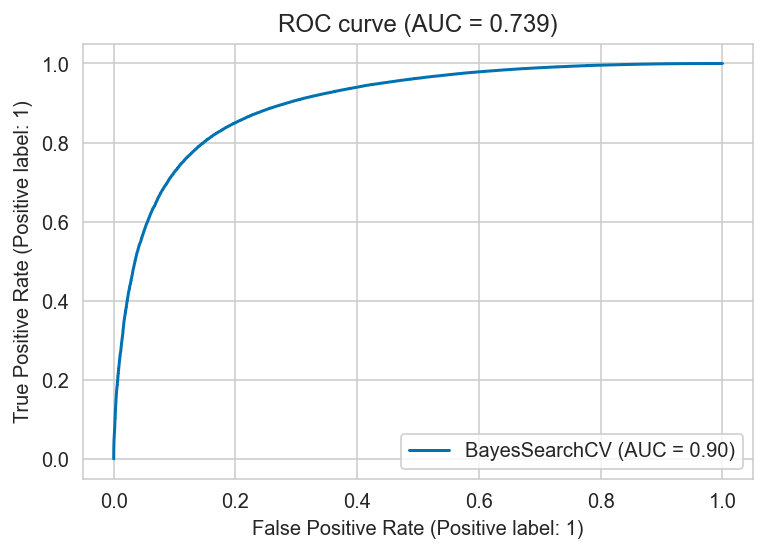

In [99]:
# calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# plot ROC curve
plot_roc_curve(opt, X_test, y_test)
plt.title('ROC curve (AUC = {:.3f})'.format(roc_auc))
plt.show()

In [138]:
model = opt

In [139]:
## Function to create confusion matrix
def make_confusion_matrix(model, X_test, y_actual, labels=[1, 0]):
    y_predict = model.predict(X_test)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index=["Actual - No", "Actual - Yes"],
                         columns=["Predicted - No", "Predicted - Yes"])
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=labels, fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

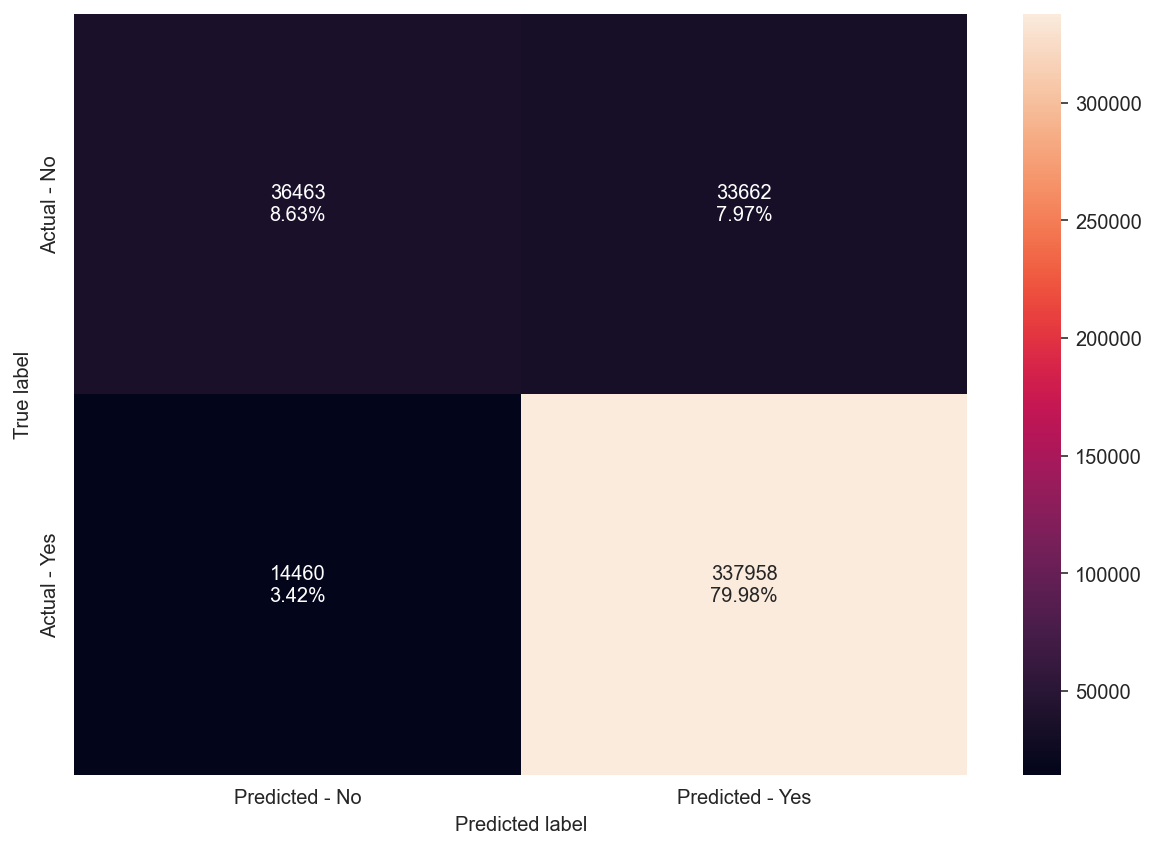

In [140]:
make_confusion_matrix(opt.best_estimator_, X_test, y_test)

In [158]:

y_pred = model.predict(X_test)
y_true = y_test

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)

# Calculate recall
recall = recall_score(y_true, y_pred)
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_true, y_pred)
print("F1-score:", f1)

# Calculate precision
precision = precision_score(y_true, y_pred)
print("Precision:", precision)

Accuracy: 0.8818345115171711
Recall: 0.9621727607556935
F1-score: 0.9314246316460286
Precision: 0.9025808787125419


In [143]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}")

True positives: 337958
False positives: 33662
True negatives: 36463
False negatives: 14460


# Refine the Model and update it with the optimal hyperparamaters

In [127]:
import xgboost as xgb

In [128]:
#show the version of xgboost
print(xgb.__version__)

1.7.4


In [129]:
opt.best_params_

OrderedDict([('clf__colsample_bylevel', 0.6940385683377097),
             ('clf__colsample_bynode', 0.9014755529890344),
             ('clf__colsample_bytree', 0.7950023816031042),
             ('clf__gamma', 1.8976180715164355),
             ('clf__learning_rate', 0.14825751436432388),
             ('clf__max_depth', 19),
             ('clf__n_estimators', 459),
             ('clf__reg_alpha', 1.7525490564514647),
             ('clf__reg_lambda', 9.68555774326904),
             ('clf__subsample', 0.9500166395782901)])

In [130]:
best_params = {'clf__colsample_bylevel': 0.6940385683377097,
               'clf__colsample_bynode': 0.9014755529890344,
               'clf__colsample_bytree': 0.7950023816031042,
               'clf__gamma': 1.8976180715164355,
               'clf__learning_rate': 0.14825751436432388,
               'clf__max_depth': 19,
               'clf__n_estimators': 459,
               'clf__reg_alpha': 1.7525490564514647,
               'clf__reg_lambda': 9.68555774326904,
               'clf__subsample': 0.9500166395782901}

In [131]:
best_model  = XGBClassifier(**best_params)

In [132]:
best_model.fit(X_train, y_train)

[14:11:51] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "clf__colsample_bylevel", "clf__colsample_bynode", "clf__colsample_bytree", "clf__gamma", "clf__learning_rate", "clf__max_depth", "clf__n_estimators", "clf__reg_alpha", "clf__reg_lambda", "clf__subsample" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              clf__colsample_bylevel=0.6940385683377097,
              clf__colsample_bynode=0.9014755529890344,
              clf__colsample_bytree=0.7950023816031042,
              clf__gamma=1.8976180715164355,
              clf__learning_rate=0.14825751436432388, clf__max_depth=19,
              clf__n_estimators=459, clf__reg_alpha=1.7525490564514647,
              clf__reg_lambda=9.6855577...
              clf__subsample=0.9500166395782901, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, ...)

In [145]:
y_pred = best_model.predict(X_test)
y_true = y_test

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)

# Calculate recall
recall = recall_score(y_true, y_pred)
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_true, y_pred)
print("F1-score:", f1)

Accuracy: 0.8818345115171711
Recall: 0.9621727607556935
F1-score: 0.9314246316460286


In [146]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}")

True positives: 339087
False positives: 36599
True negatives: 33526
False negatives: 13331


In [147]:
model = best_model

In [148]:
def make_confusion_matrix(model, X_test, y_actual, labels=[1, 0]):
    y_predict = model.predict(X_test)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index=["Actual - No", "Actual - Yes"],
                         columns=["Predicted - No", "Predicted - Yes"])
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=labels, fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

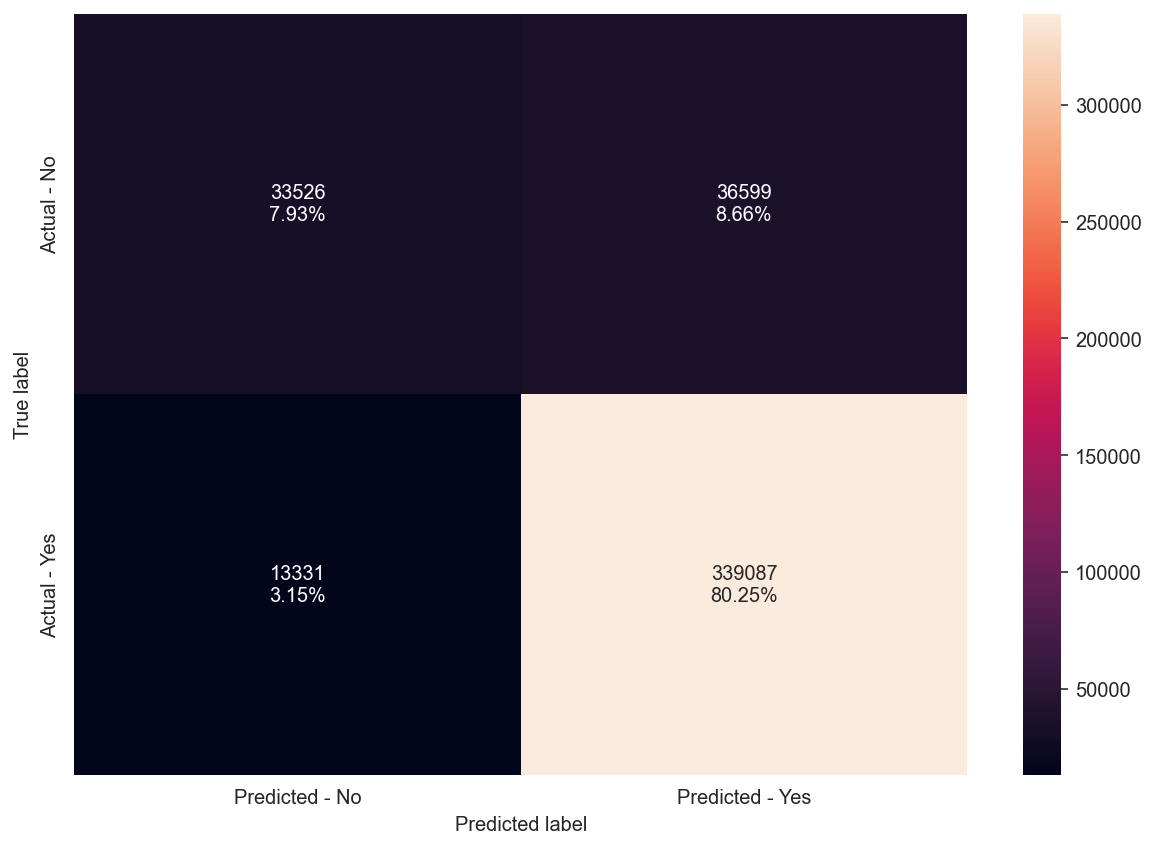

In [149]:
make_confusion_matrix(best_model, X_test, y_test)

In [150]:
y_pred = best_model.predict(X_test)

# calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)

# print ROC AUC score
print("ROC AUC score: {:.3f}".format(roc_auc))

ROC AUC score: 0.720


In [151]:
best_model.score(X_test, y_test)

0.8818345115171711

In [152]:
y_pred = best_model.predict(X_test)

# calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)

# print ROC AUC score
print("ROC AUC score: {:.3f}".format(roc_auc))

ROC AUC score: 0.720


C:\Users\david\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.



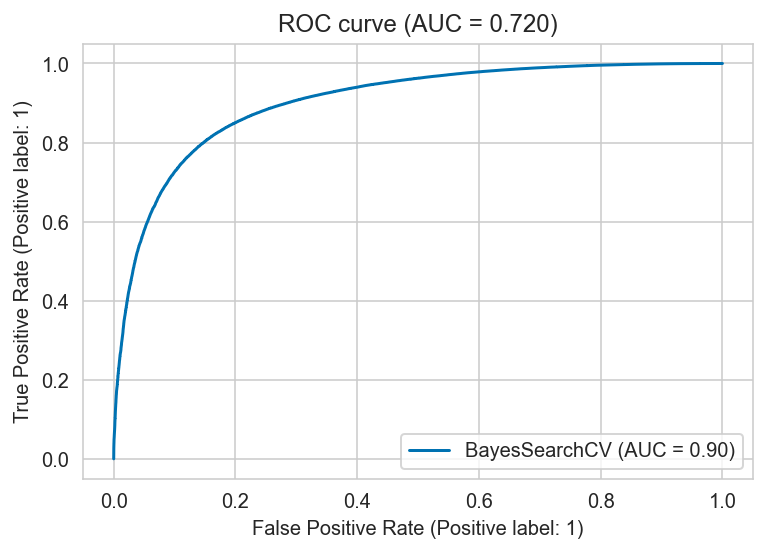

In [155]:
# calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# plot ROC curve
plot_roc_curve(opt, X_test, y_test)
plt.title('ROC curve (AUC = {:.3f})'.format(roc_auc))
plt.show()

--------------------